In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [3]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [4]:
google_cloud_cmip6

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [5]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [6]:
gfdl_esm4_sos1_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [7]:
gfdl_esm4_sos1_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
13884,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,sos,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [8]:
zstore_esm4_sos1 = gfdl_esm4_sos1_data.zstore.values[-1]
mapper_esm4_sos1 = gcs.get_mapper(zstore_esm4_sos1)
gfdl_esm4_sos1 = xr.open_zarr(mapper_esm4_sos1, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_sos1

<xarray.DataArray 'sos' (time: 1032, latitude: 180, longitude: 360)>
dask.array<open_dataset-sos, shape=(1032, 180, 360), dtype=float32, chunksize=(439, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Surface Salinity
    original_name:  sos
    standard_name:  sea_surface_salinity
    units:          0.001

In [9]:
gfdl_esm4_sos2_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [10]:
gfdl_esm4_sos2_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15226,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Omon,sos,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [11]:
zstore_esm4_sos2 = gfdl_esm4_sos2_data.zstore.values[-1]
mapper_esm4_sos2 = gcs.get_mapper(zstore_esm4_sos2)
gfdl_esm4_sos2 = xr.open_zarr(mapper_esm4_sos2, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_sos2

<xarray.DataArray 'sos' (time: 1032, latitude: 180, longitude: 360)>
dask.array<open_dataset-sos, shape=(1032, 180, 360), dtype=float32, chunksize=(439, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Surface Salinity
    original_name:  sos
    standard_name:  sea_surface_salinity
    units:          0.001

In [12]:
gfdl_esm4_sos3_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [13]:
gfdl_esm4_sos3_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
12051,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Omon,sos,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [14]:
zstore_esm4_sos3 = gfdl_esm4_sos3_data.zstore.values[-1]
mapper_esm4_sos3 = gcs.get_mapper(zstore_esm4_sos3)
gfdl_esm4_sos3 = xr.open_zarr(mapper_esm4_sos3, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_sos3

<xarray.DataArray 'sos' (time: 1032, latitude: 180, longitude: 360)>
dask.array<open_dataset-sos, shape=(1032, 180, 360), dtype=float32, chunksize=(439, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Surface Salinity
    original_name:  sos
    standard_name:  sea_surface_salinity
    units:          0.001

In [15]:
gfdl_esm4_pr1_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [16]:
gfdl_esm4_pr1_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15844,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [17]:
zstore_esm4_pr1 = gfdl_esm4_pr1_data.zstore.values[-1]
mapper_esm4_pr1 = gcs.get_mapper(zstore_esm4_pr1)
gfdl_esm4_pr1 = xr.open_zarr(mapper_esm4_pr1, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_pr1

<xarray.DataArray 'pr' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

In [18]:
gfdl_esm4_pr2_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [19]:
gfdl_esm4_pr2_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15390,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [20]:
zstore_esm4_pr2 = gfdl_esm4_pr2_data.zstore.values[-1]
mapper_esm4_pr2 = gcs.get_mapper(zstore_esm4_pr2)
gfdl_esm4_pr2 = xr.open_zarr(mapper_esm4_pr2, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_pr2

<xarray.DataArray 'pr' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(618, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

In [21]:
gfdl_esm4_pr3_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [22]:
gfdl_esm4_pr3_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
18988,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [23]:
zstore_esm4_pr3 = gfdl_esm4_pr3_data.zstore.values[-1]
mapper_esm4_pr3 = gcs.get_mapper(zstore_esm4_pr3)
gfdl_esm4_pr3 = xr.open_zarr(mapper_esm4_pr3, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_pr3

<xarray.DataArray 'pr' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

In [24]:
gfdl_esm4_prw1_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [25]:
gfdl_esm4_prw1_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15846,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,prw,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [26]:
zstore_esm4_prw1 = gfdl_esm4_prw1_data.zstore.values[-1]
mapper_esm4_prw1 = gcs.get_mapper(zstore_esm4_prw1)
gfdl_esm4_prw1 = xr.open_zarr(mapper_esm4_prw1, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prw1

<xarray.DataArray 'prw' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prw, shape=(1032, 180, 288), dtype=float32, chunksize=(682, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Water Vapor Path
    original_name:  prw
    standard_name:  atmosphere_mass_content_of_water_vapor
    units:          kg m-2

In [27]:
gfdl_esm4_prw2_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [28]:
gfdl_esm4_prw2_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15388,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,prw,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [29]:
zstore_esm4_prw2 = gfdl_esm4_prw2_data.zstore.values[-1]
mapper_esm4_prw2 = gcs.get_mapper(zstore_esm4_prw2)
gfdl_esm4_prw2 = xr.open_zarr(mapper_esm4_prw2, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prw2

<xarray.DataArray 'prw' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prw, shape=(1032, 180, 288), dtype=float32, chunksize=(682, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Water Vapor Path
    original_name:  prw
    standard_name:  atmosphere_mass_content_of_water_vapor
    units:          kg m-2

In [30]:
gfdl_esm4_prw3_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [31]:
gfdl_esm4_prw3_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
18990,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,prw,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [32]:
zstore_esm4_prw3 = gfdl_esm4_prw3_data.zstore.values[-1]
mapper_esm4_prw3 = gcs.get_mapper(zstore_esm4_prw3)
gfdl_esm4_prw3 = xr.open_zarr(mapper_esm4_prw3, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prw3

<xarray.DataArray 'prw' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prw, shape=(1032, 180, 288), dtype=float32, chunksize=(683, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Water Vapor Path
    original_name:  prw
    standard_name:  atmosphere_mass_content_of_water_vapor
    units:          kg m-2

In [33]:
gfdl_esm4_evspsbl1_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [34]:
gfdl_esm4_evspsbl1_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15941,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,evspsbl,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [35]:
zstore_esm4_evspsbl1 = gfdl_esm4_evspsbl1_data.zstore.values[-1]
mapper_esm4_evspsbl1 = gcs.get_mapper(zstore_esm4_evspsbl1)
gfdl_esm4_evspsbl1 = xr.open_zarr(mapper_esm4_evspsbl1, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_evspsbl1

<xarray.DataArray 'evspsbl' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-evspsbl, shape=(1032, 180, 288), dtype=float32, chunksize=(623, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Evaporation including Sublimation and Transpiration
    original_name:  evspsbl
    standard_name:  water_evapotranspiration_flux
    units:          kg m-2 s-1

In [36]:
gfdl_esm4_evspsbl2_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [37]:
gfdl_esm4_evspsbl2_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15359,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,evspsbl,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [38]:
zstore_esm4_evspsbl2 = gfdl_esm4_evspsbl2_data.zstore.values[-1]
mapper_esm4_evspsbl2 = gcs.get_mapper(zstore_esm4_evspsbl2)
gfdl_esm4_evspsbl2 = xr.open_zarr(mapper_esm4_evspsbl2, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_evspsbl2

<xarray.DataArray 'evspsbl' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-evspsbl, shape=(1032, 180, 288), dtype=float32, chunksize=(622, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Evaporation including Sublimation and Transpiration
    original_name:  evspsbl
    standard_name:  water_evapotranspiration_flux
    units:          kg m-2 s-1

In [39]:
gfdl_esm4_evspsbl3_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [40]:
gfdl_esm4_evspsbl3_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
18977,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,evspsbl,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [41]:
zstore_esm4_evspsbl3 = gfdl_esm4_evspsbl3_data.zstore.values[-1]
mapper_esm4_evspsbl3 = gcs.get_mapper(zstore_esm4_evspsbl3)
gfdl_esm4_evspsbl3 = xr.open_zarr(mapper_esm4_evspsbl3, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_evspsbl3

<xarray.DataArray 'evspsbl' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-evspsbl, shape=(1032, 180, 288), dtype=float32, chunksize=(622, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Evaporation including Sublimation and Transpiration
    original_name:  evspsbl
    standard_name:  water_evapotranspiration_flux
    units:          kg m-2 s-1

In [42]:
gfdl_esm4_prsn1_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [43]:
gfdl_esm4_prsn1_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15845,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,prsn,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [44]:
zstore_esm4_prsn1 = gfdl_esm4_prsn1_data.zstore.values[-1]
mapper_esm4_prsn1 = gcs.get_mapper(zstore_esm4_prsn1)
gfdl_esm4_prsn1 = xr.open_zarr(mapper_esm4_prsn1, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prsn1

<xarray.DataArray 'prsn' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prsn, shape=(1032, 180, 288), dtype=float32, chunksize=(1032, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Snowfall Flux
    original_name:  prsn
    standard_name:  snowfall_flux
    units:          kg m-2 s-1

In [45]:
gfdl_esm4_prsn2_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [46]:
gfdl_esm4_prsn2_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15389,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,prsn,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [47]:
zstore_esm4_prsn2 = gfdl_esm4_prsn2_data.zstore.values[-1]
mapper_esm4_prsn2 = gcs.get_mapper(zstore_esm4_prsn2)
gfdl_esm4_prsn2 = xr.open_zarr(mapper_esm4_prsn2, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prsn2

<xarray.DataArray 'prsn' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prsn, shape=(1032, 180, 288), dtype=float32, chunksize=(1032, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Snowfall Flux
    original_name:  prsn
    standard_name:  snowfall_flux
    units:          kg m-2 s-1

In [48]:
gfdl_esm4_prsn3_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [49]:
gfdl_esm4_prsn3_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
18989,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,prsn,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [50]:
zstore_esm4_prsn3 = gfdl_esm4_prsn3_data.zstore.values[-1]
mapper_esm4_prsn3 = gcs.get_mapper(zstore_esm4_prsn3)
gfdl_esm4_prsn3 = xr.open_zarr(mapper_esm4_prsn3, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prsn3

<xarray.DataArray 'prsn' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prsn, shape=(1032, 180, 288), dtype=float32, chunksize=(1032, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Snowfall Flux
    original_name:  prsn
    standard_name:  snowfall_flux
    units:          kg m-2 s-1

# Sea surface salinity

(array([1.7530700e+05, 7.1470000e+04, 1.7651100e+05, 5.0779800e+05,
        2.0466004e+07, 2.4562348e+07, 2.3160000e+04, 5.6180000e+03,
        8.5900000e+02, 9.7300000e+02]),
 array([9.99999978e-03, 6.83293343e+00, 1.36558666e+01, 2.04787998e+01,
        2.73017330e+01, 3.41246681e+01, 4.09476013e+01, 4.77705345e+01,
        5.45934677e+01, 6.14164009e+01, 6.82393341e+01]),
 <BarContainer object of 10 artists>)

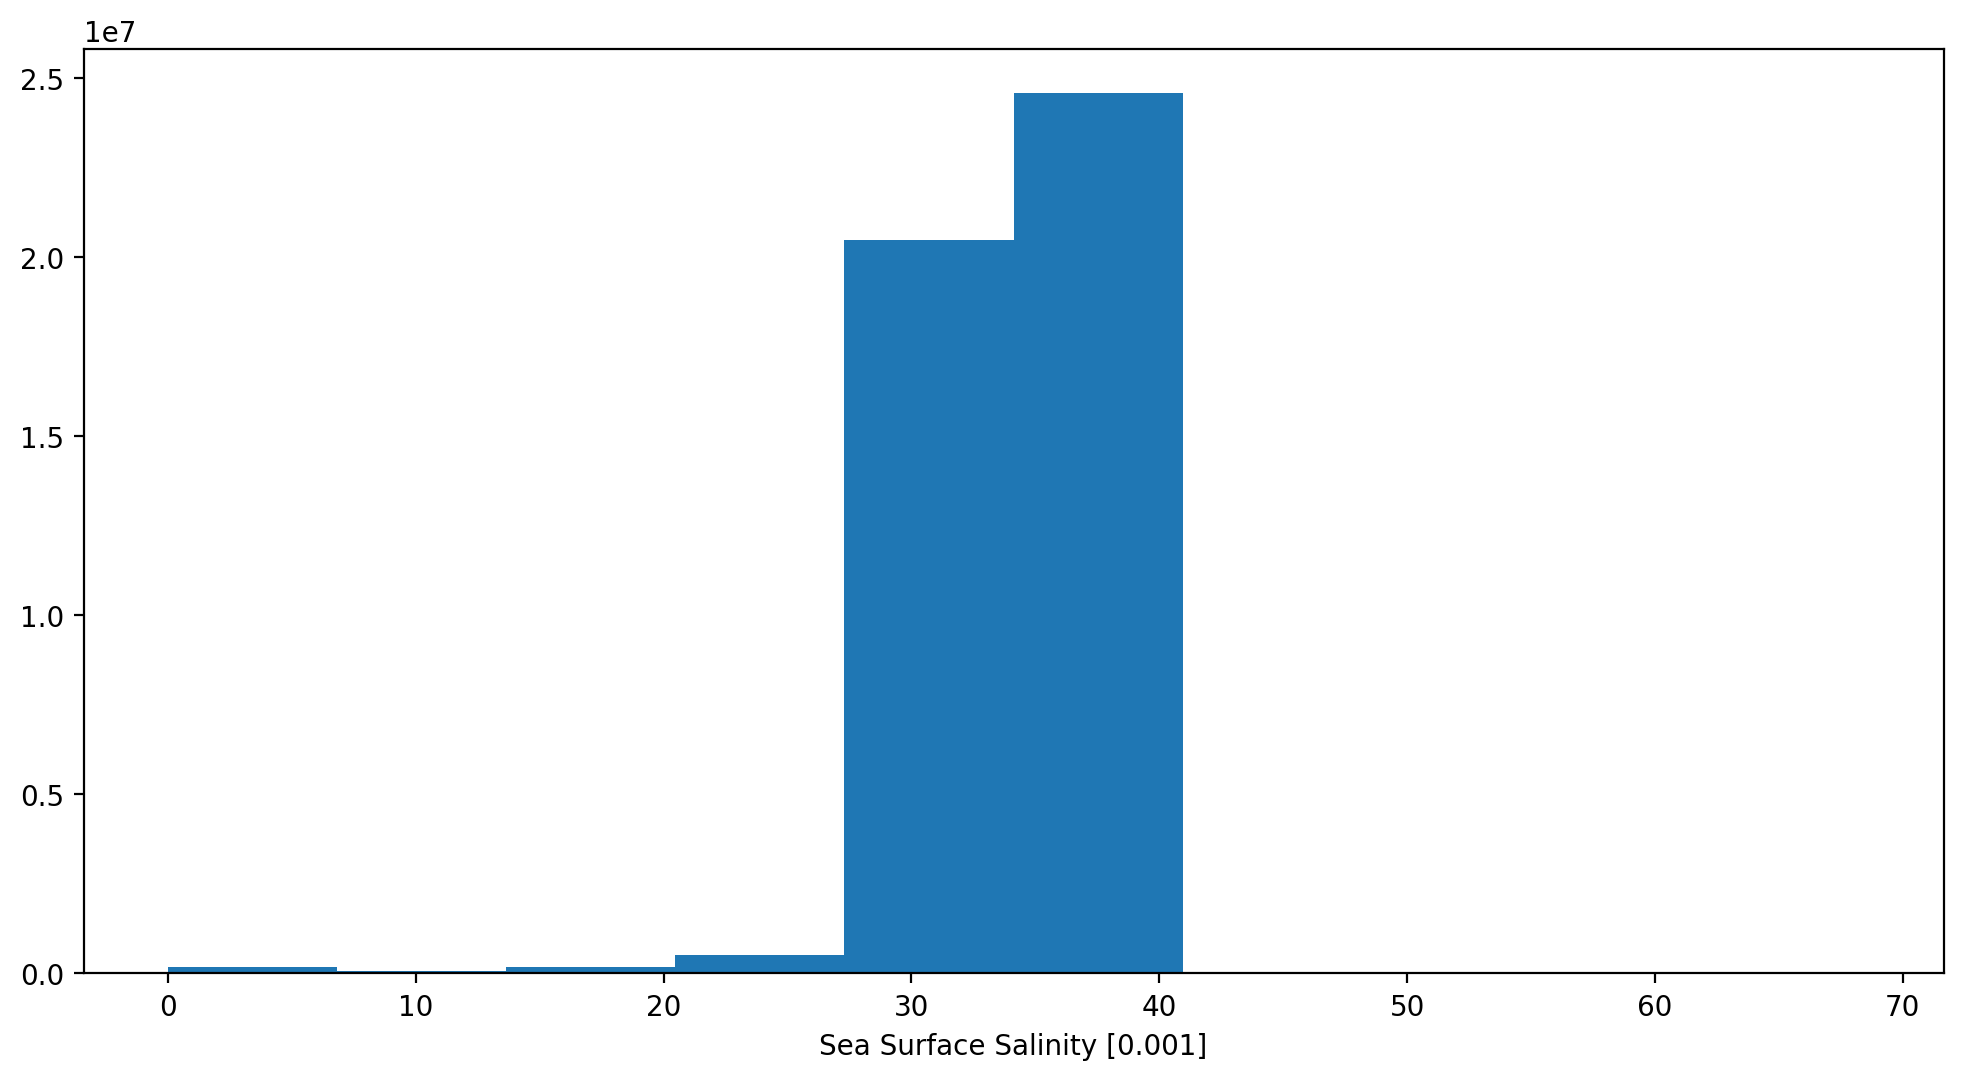

In [51]:
gfdl_esm4_sos1.plot()

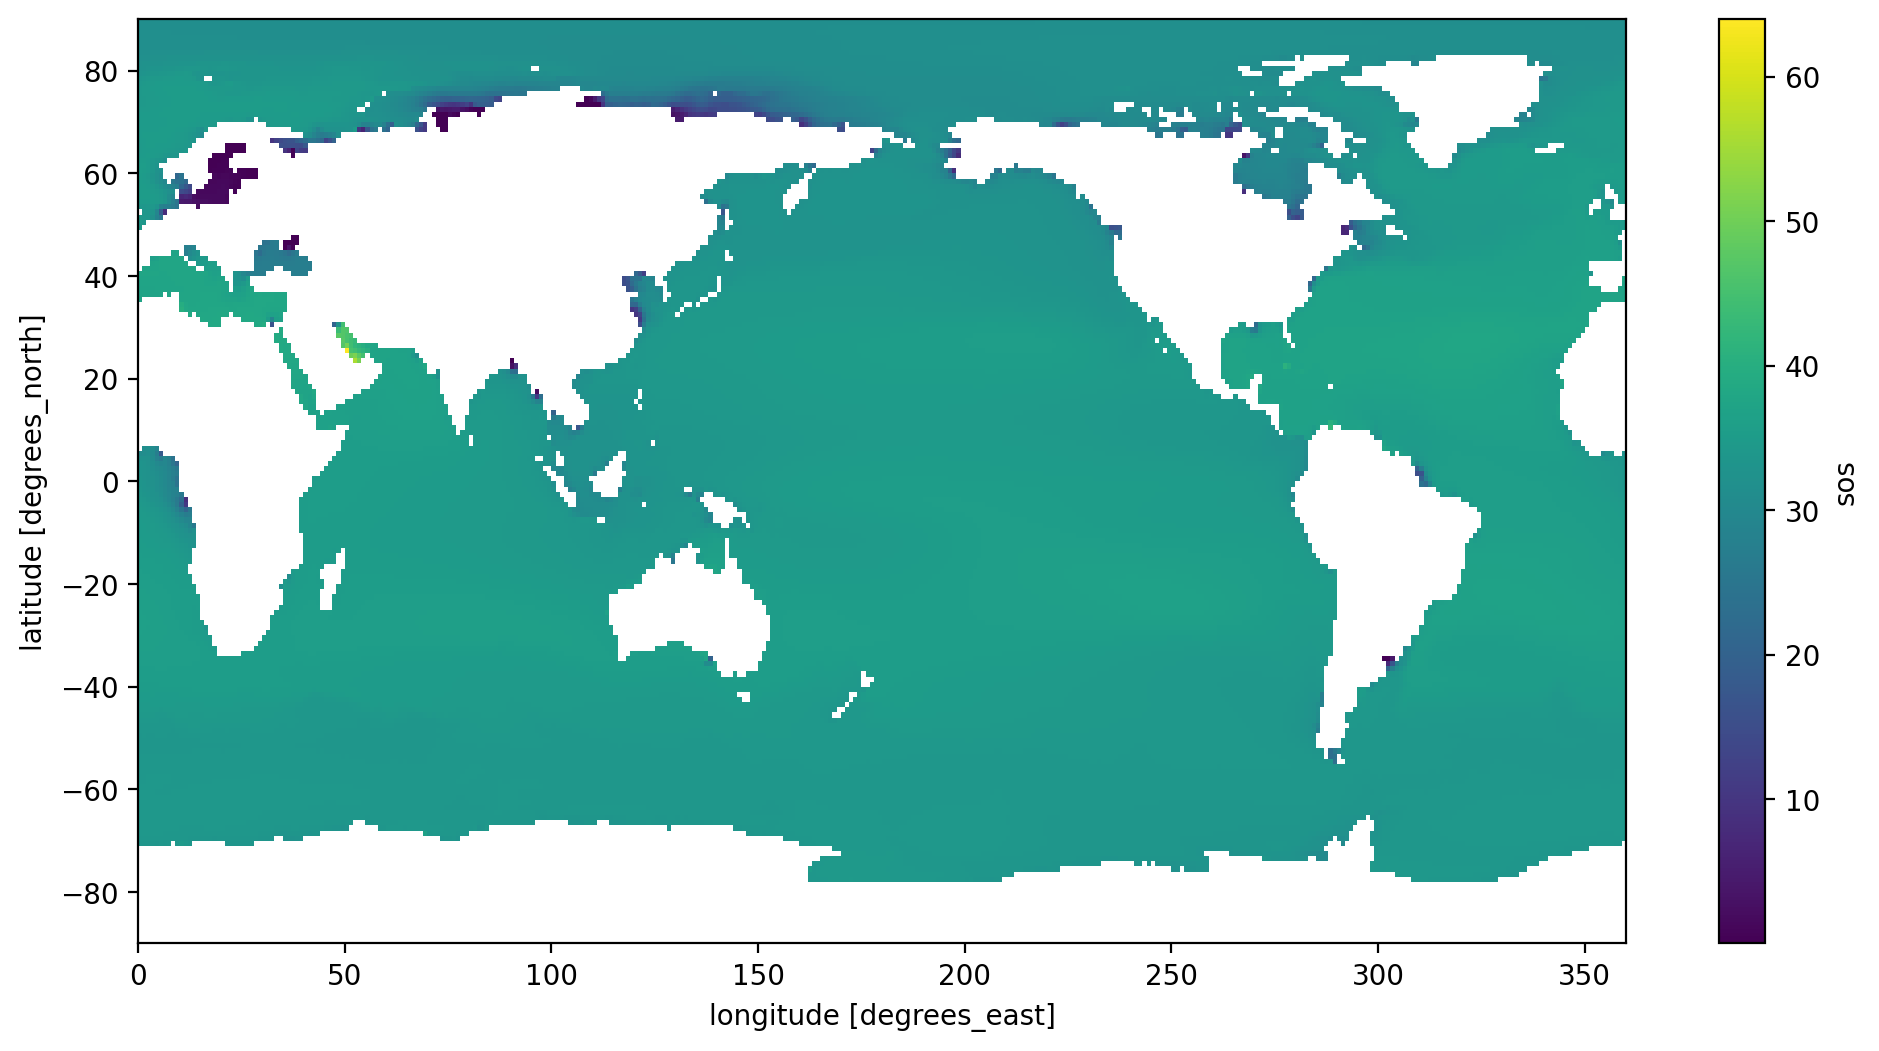

In [52]:
gfdl_esm4_sos1.sel(time=slice('2015-01-16','2100-12-01')).mean(dim='time').plot()

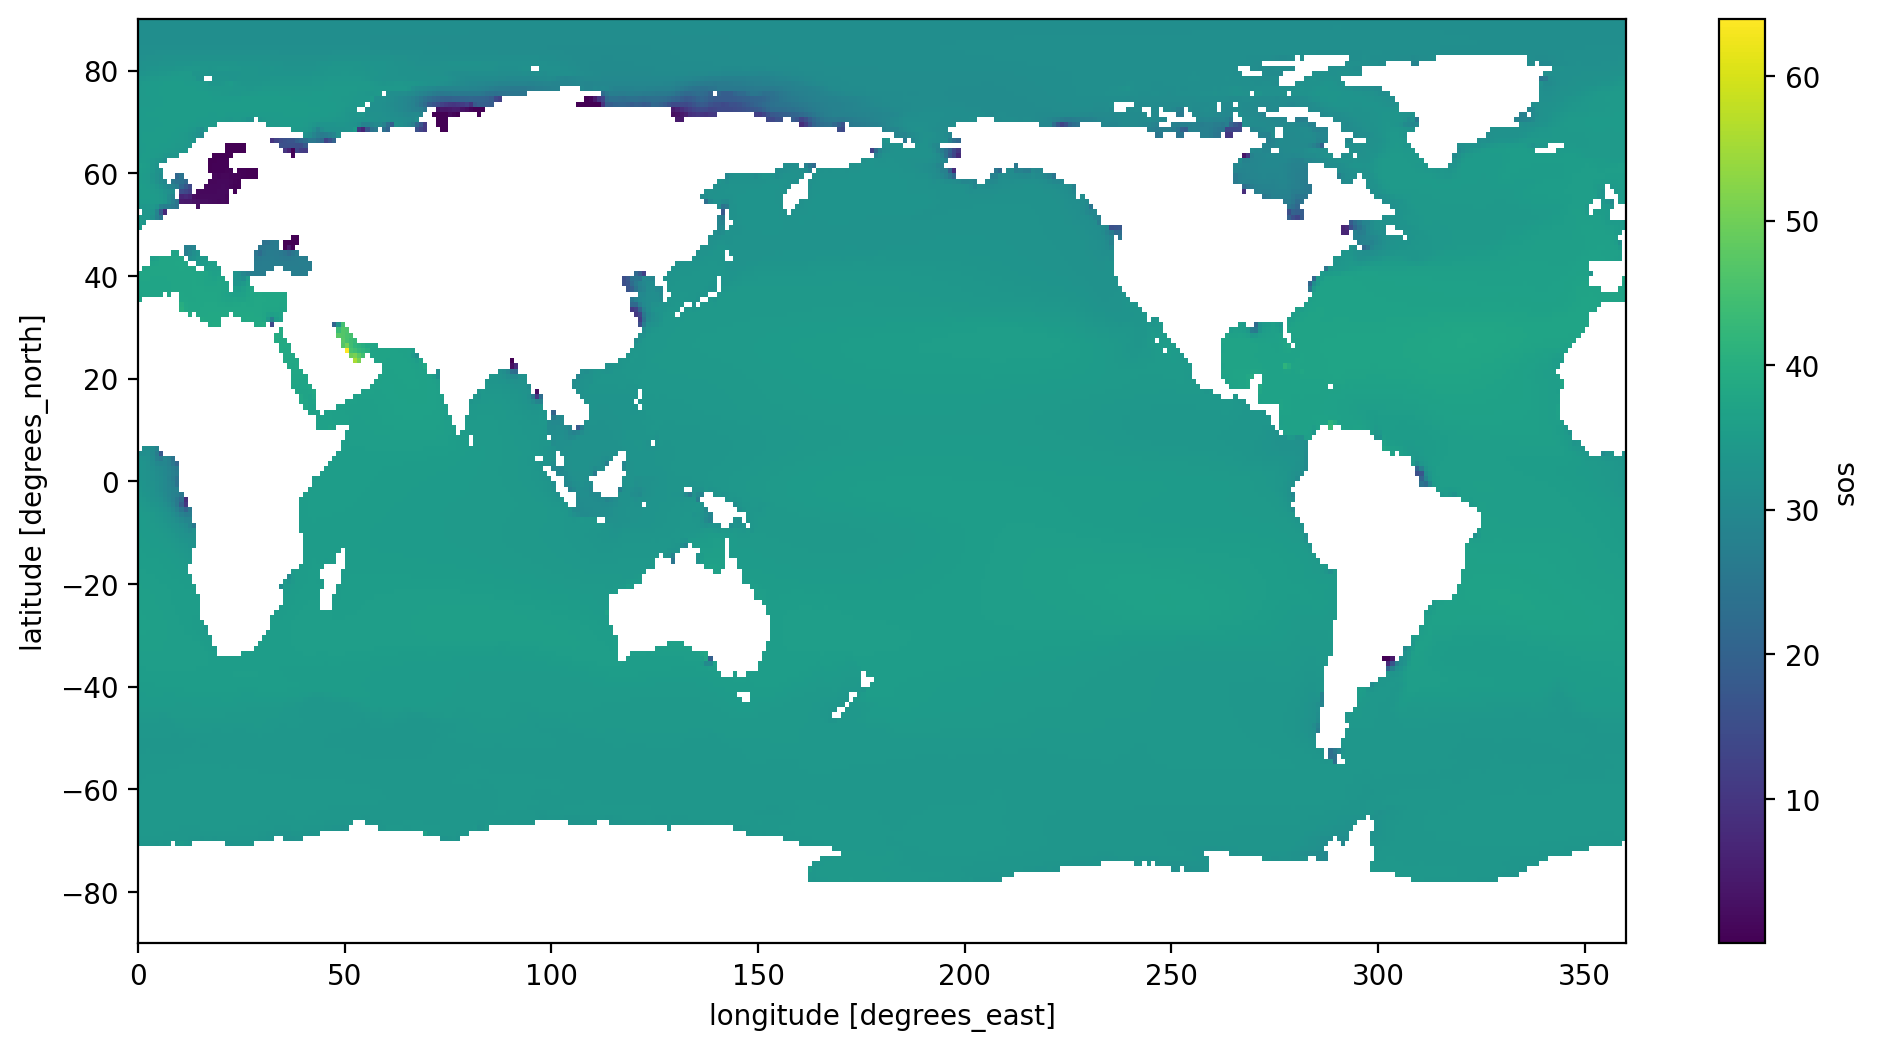

In [53]:
gfdl_esm4_sos2.sel(time=slice('2015-01-16','2100-12-01')).mean(dim='time').plot()

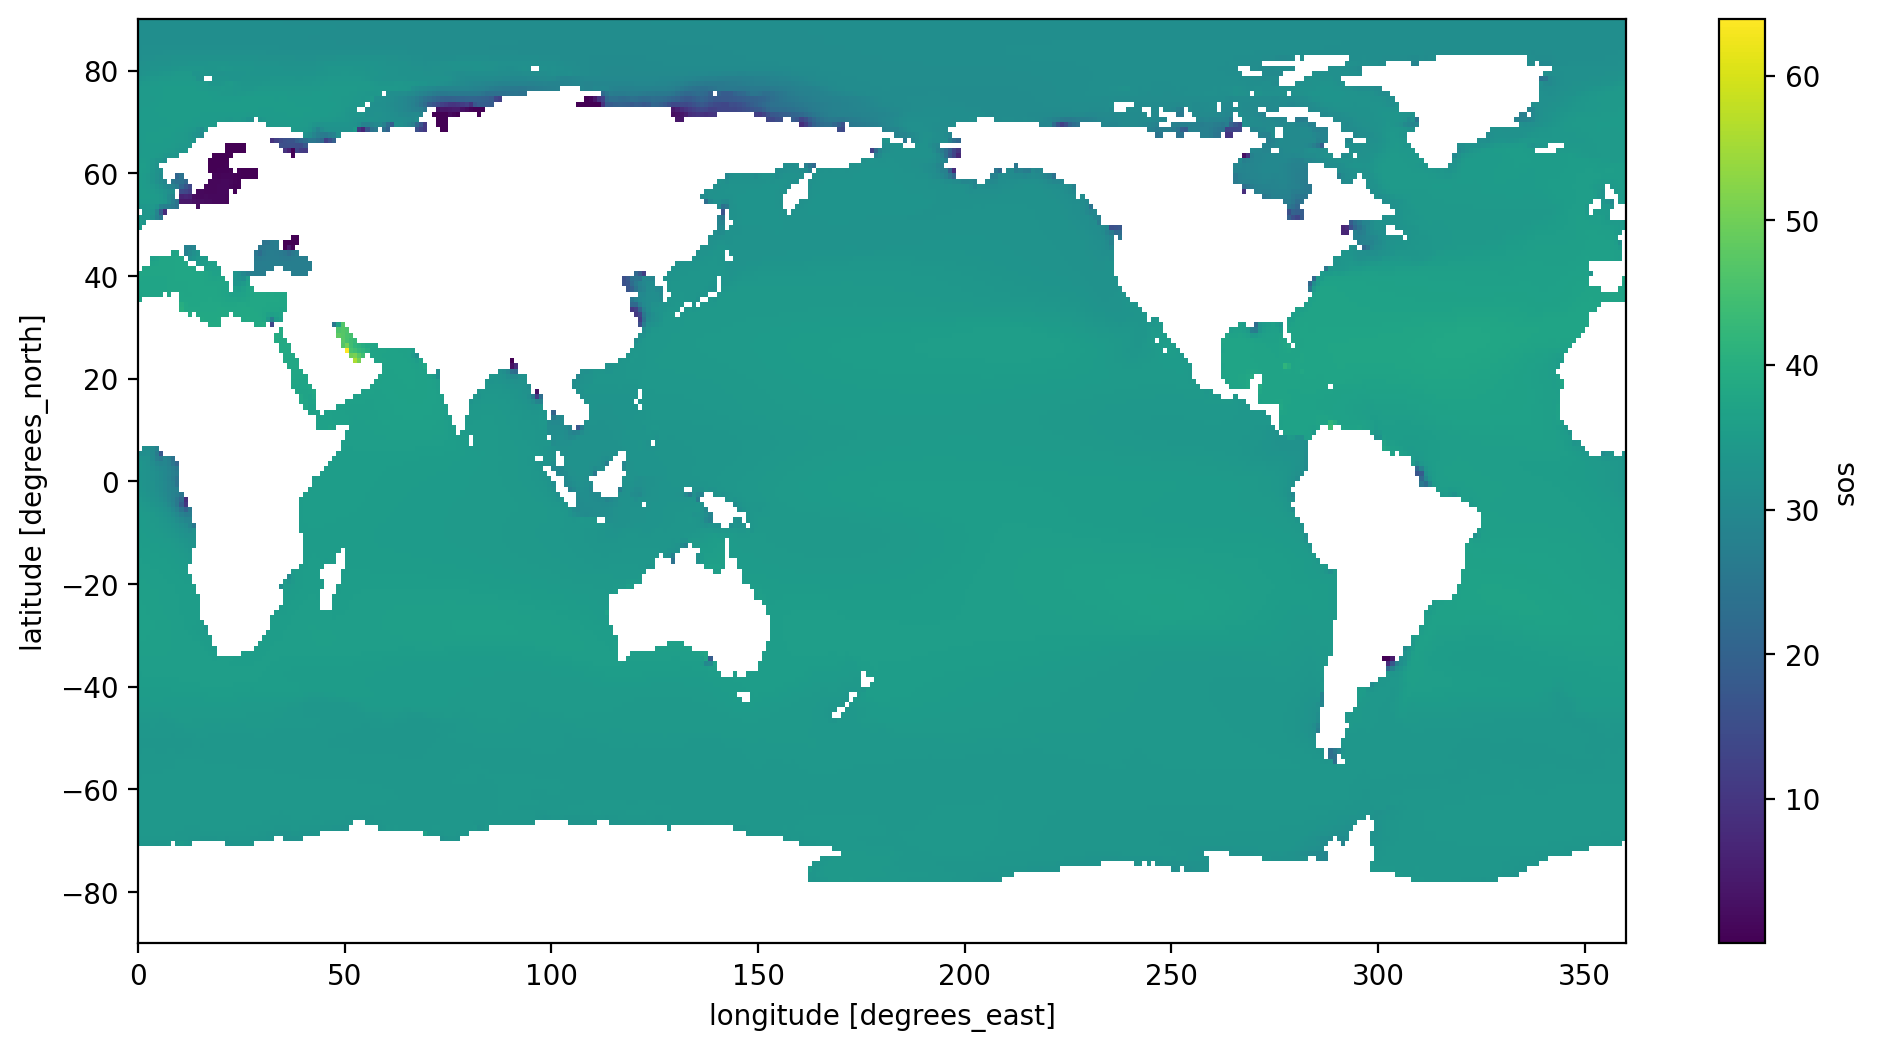

In [54]:
gfdl_esm4_sos3.sel(time=slice('2015-01-16','2100-12-01')).mean(dim='time').plot()

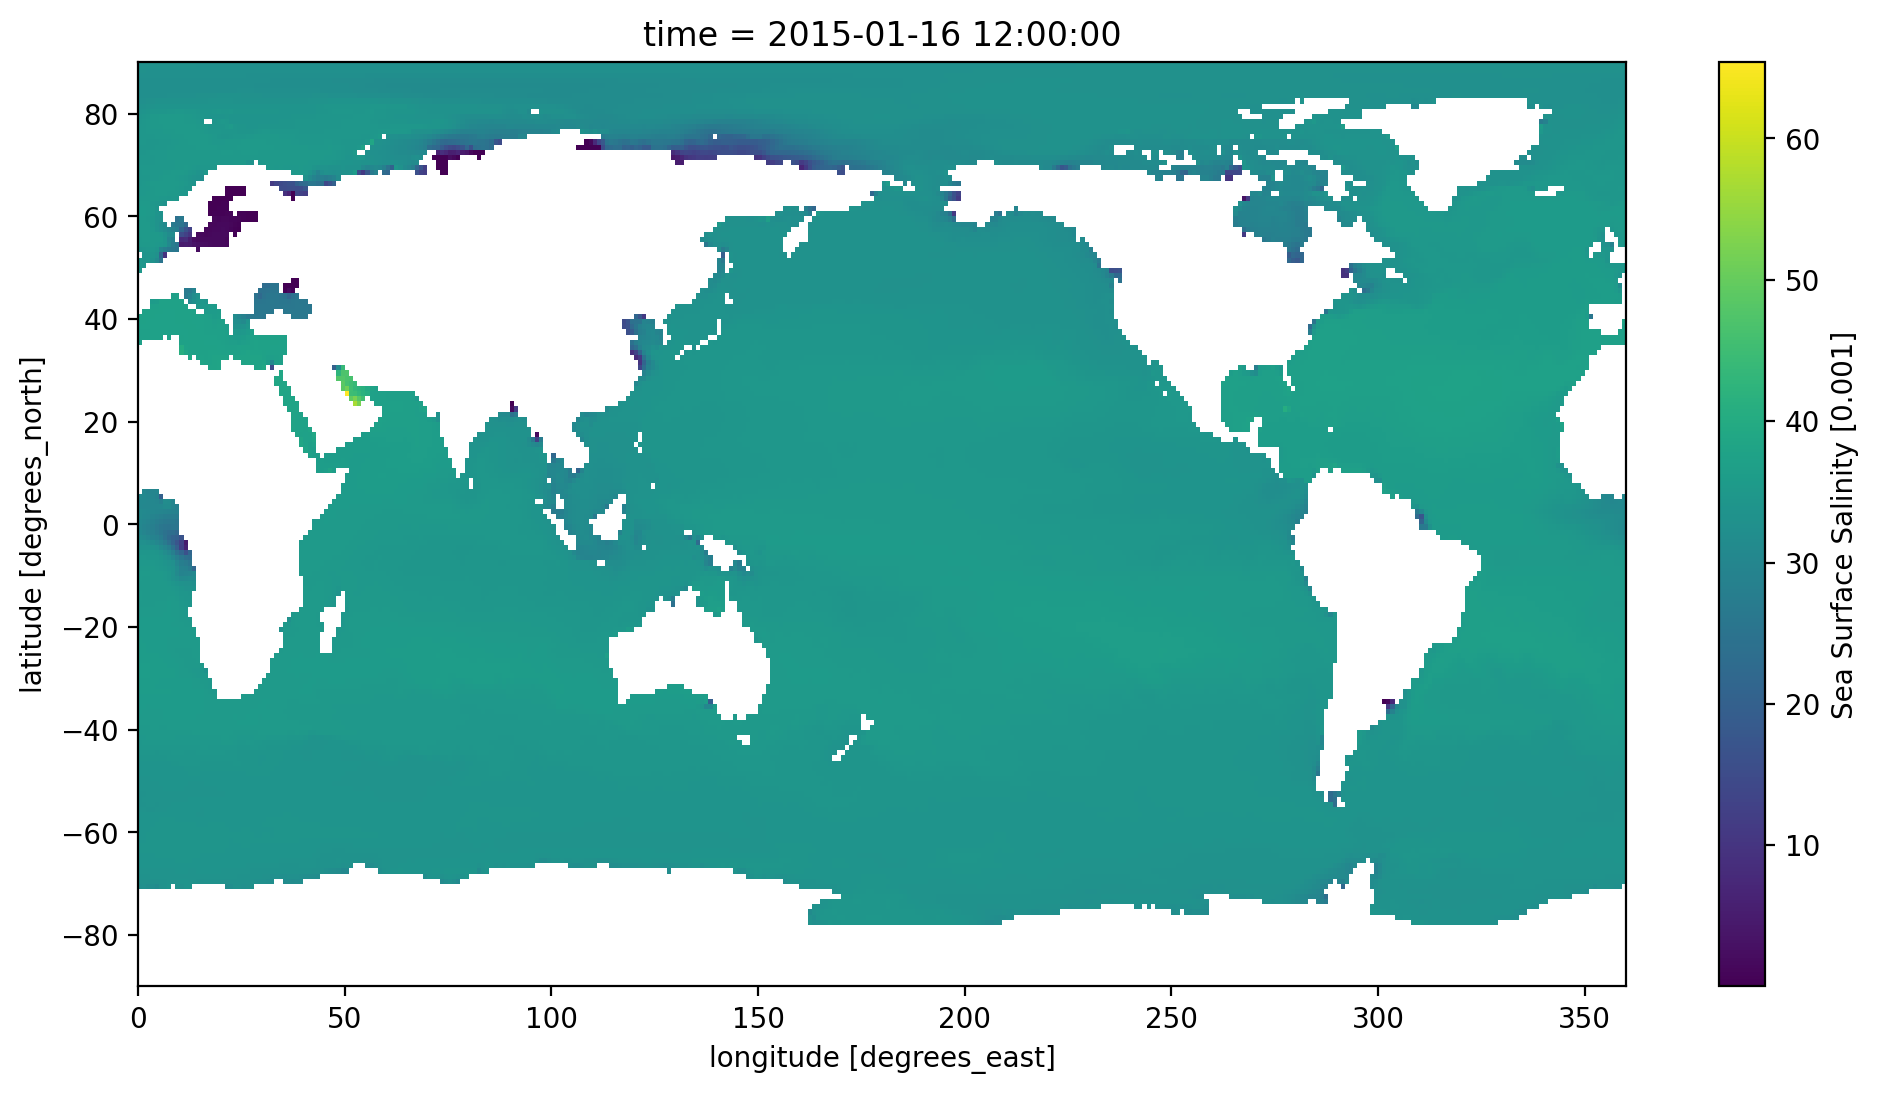

In [55]:
gfdl_esm4_sos1.sel(time=('2015-01-16')).plot()

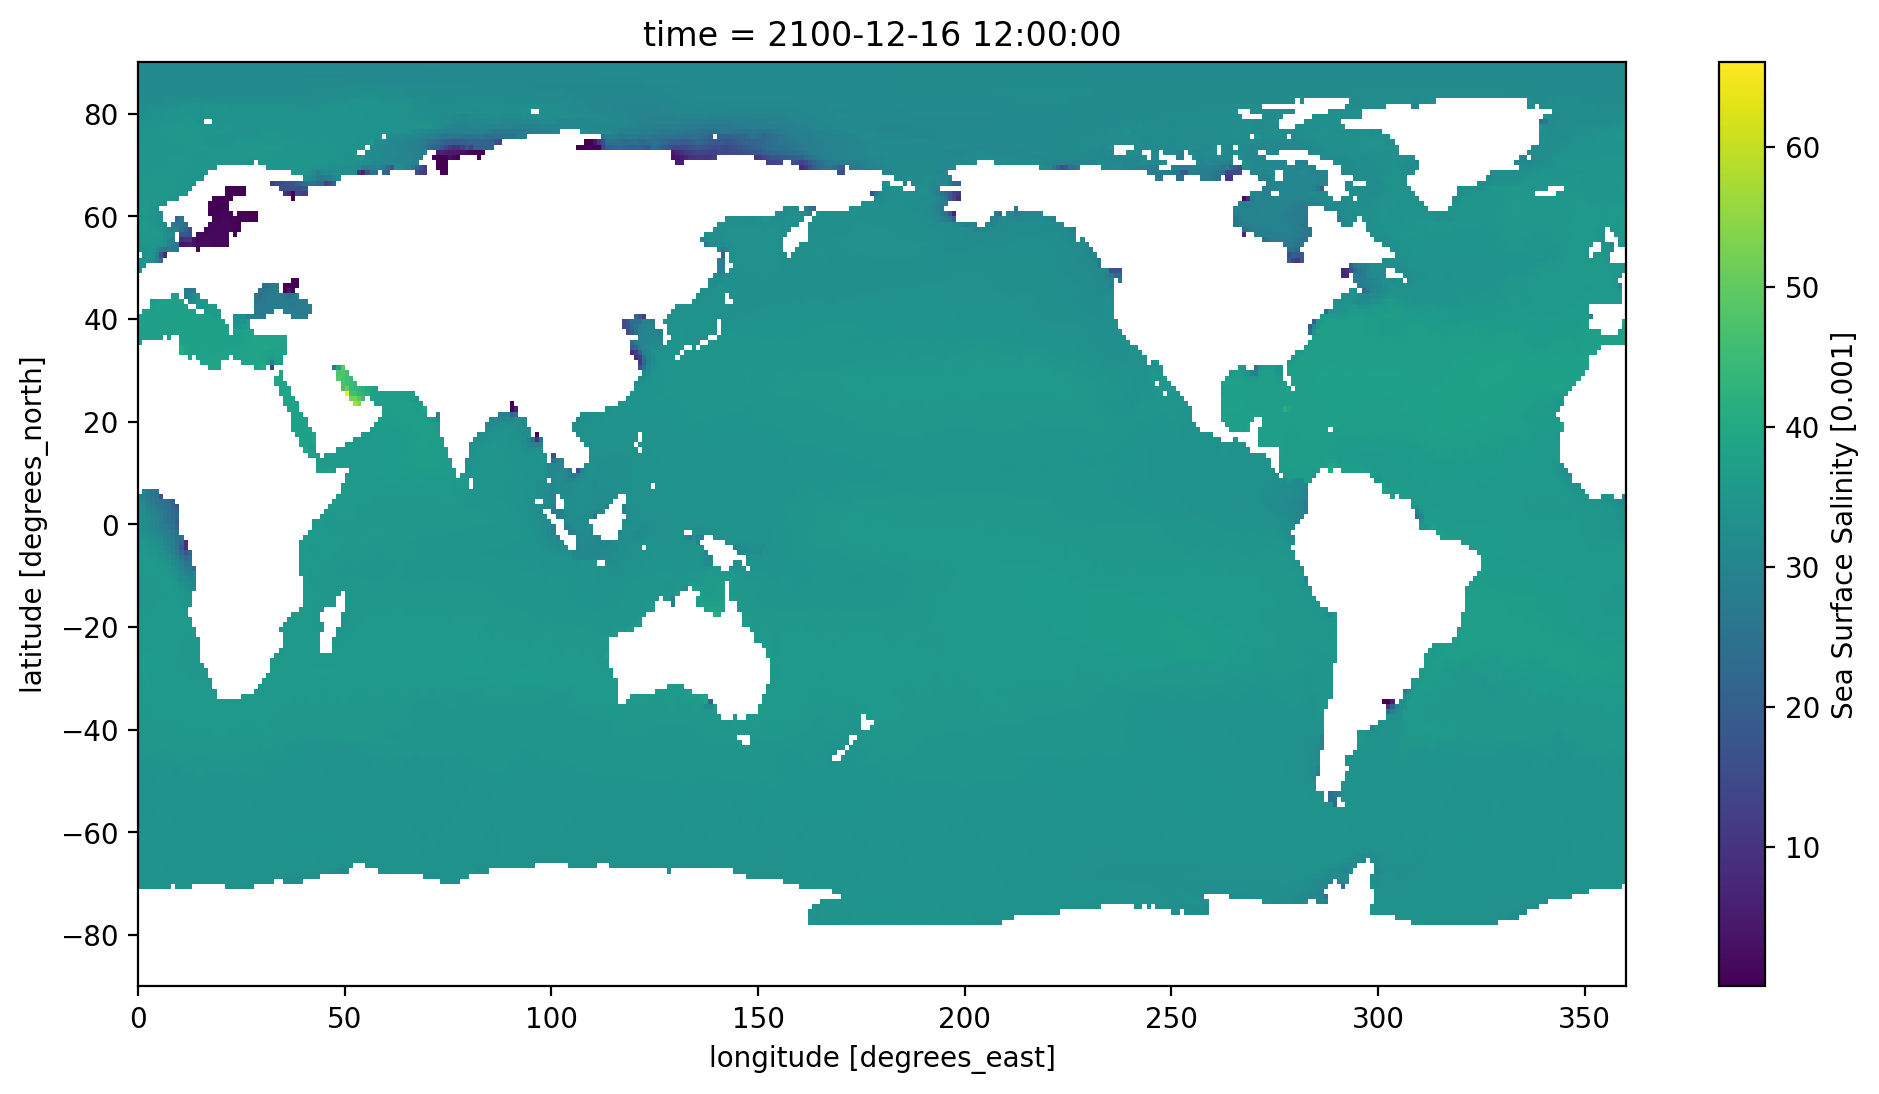

In [56]:
gfdl_esm4_sos1.sel(time=('2100-12-16')).plot()

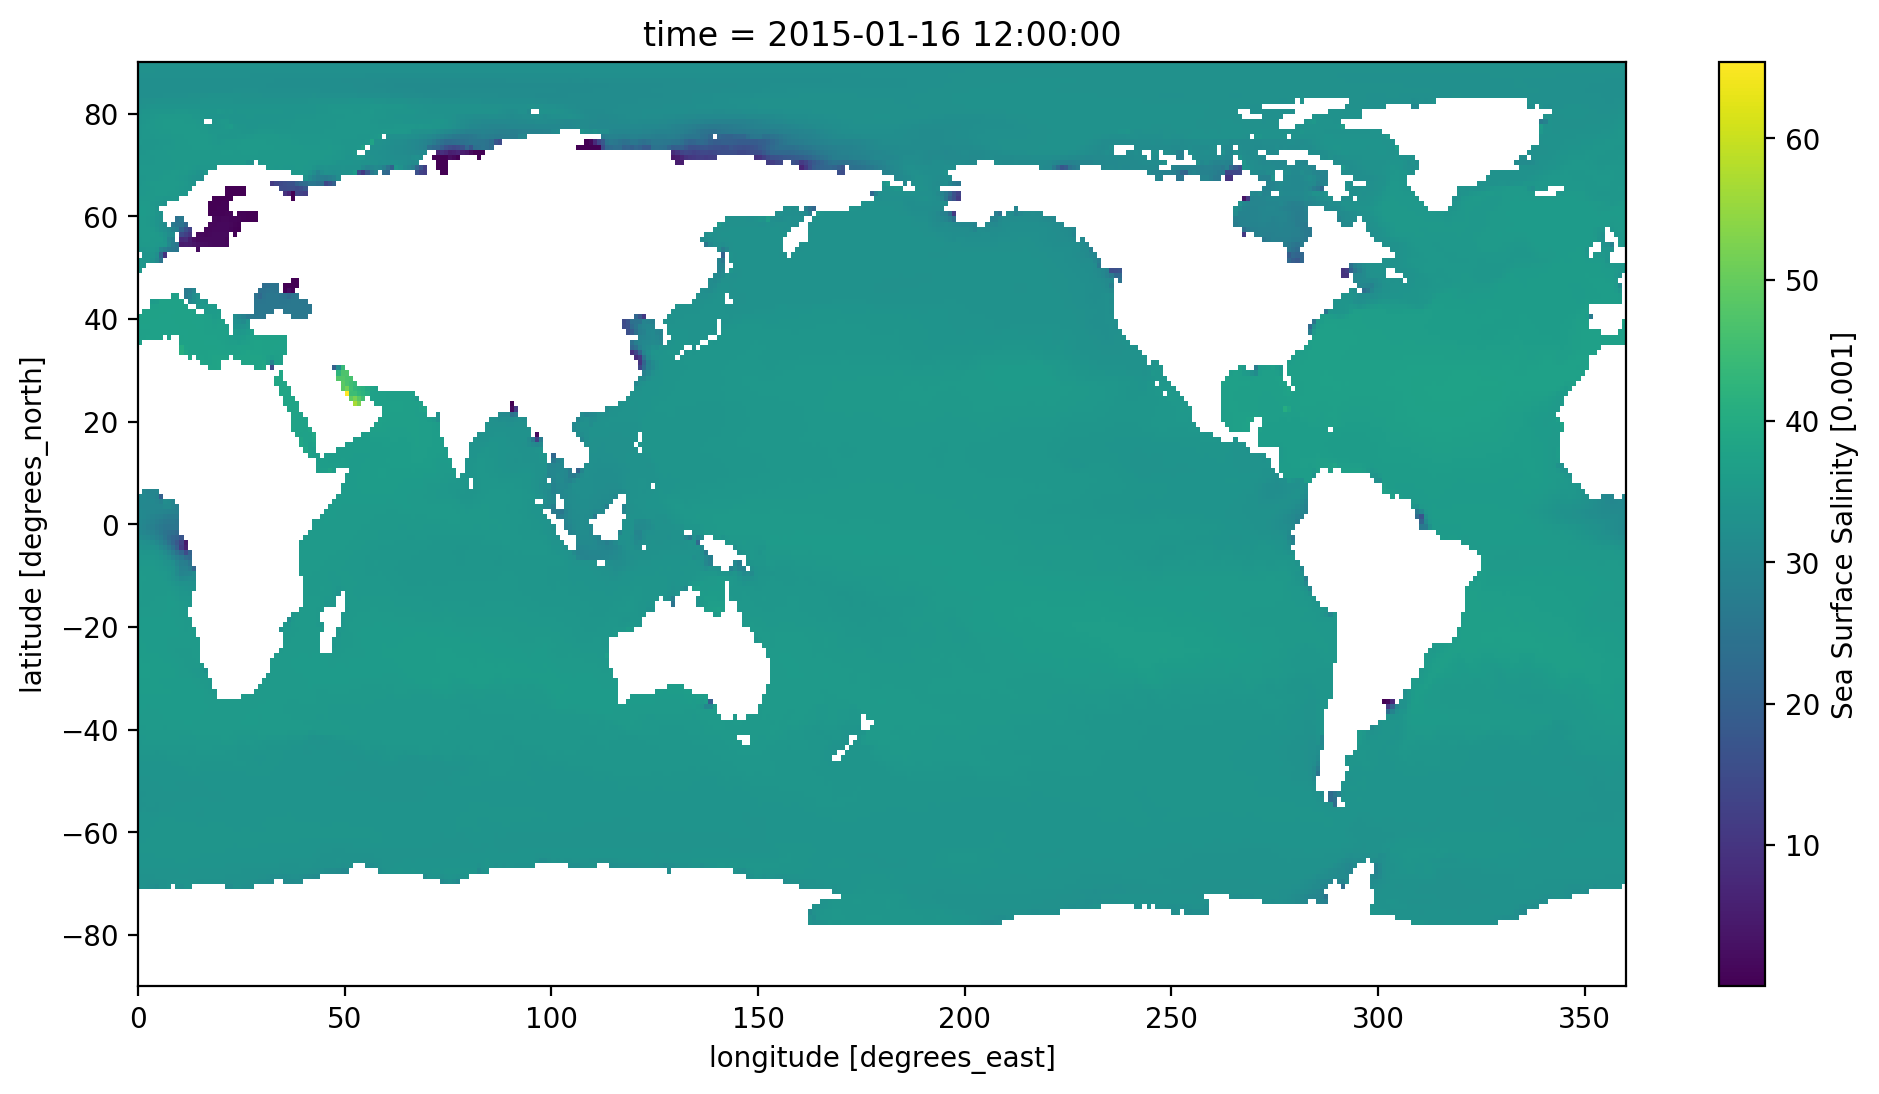

In [57]:
gfdl_esm4_sos2.sel(time=('2015-01-16')).plot()

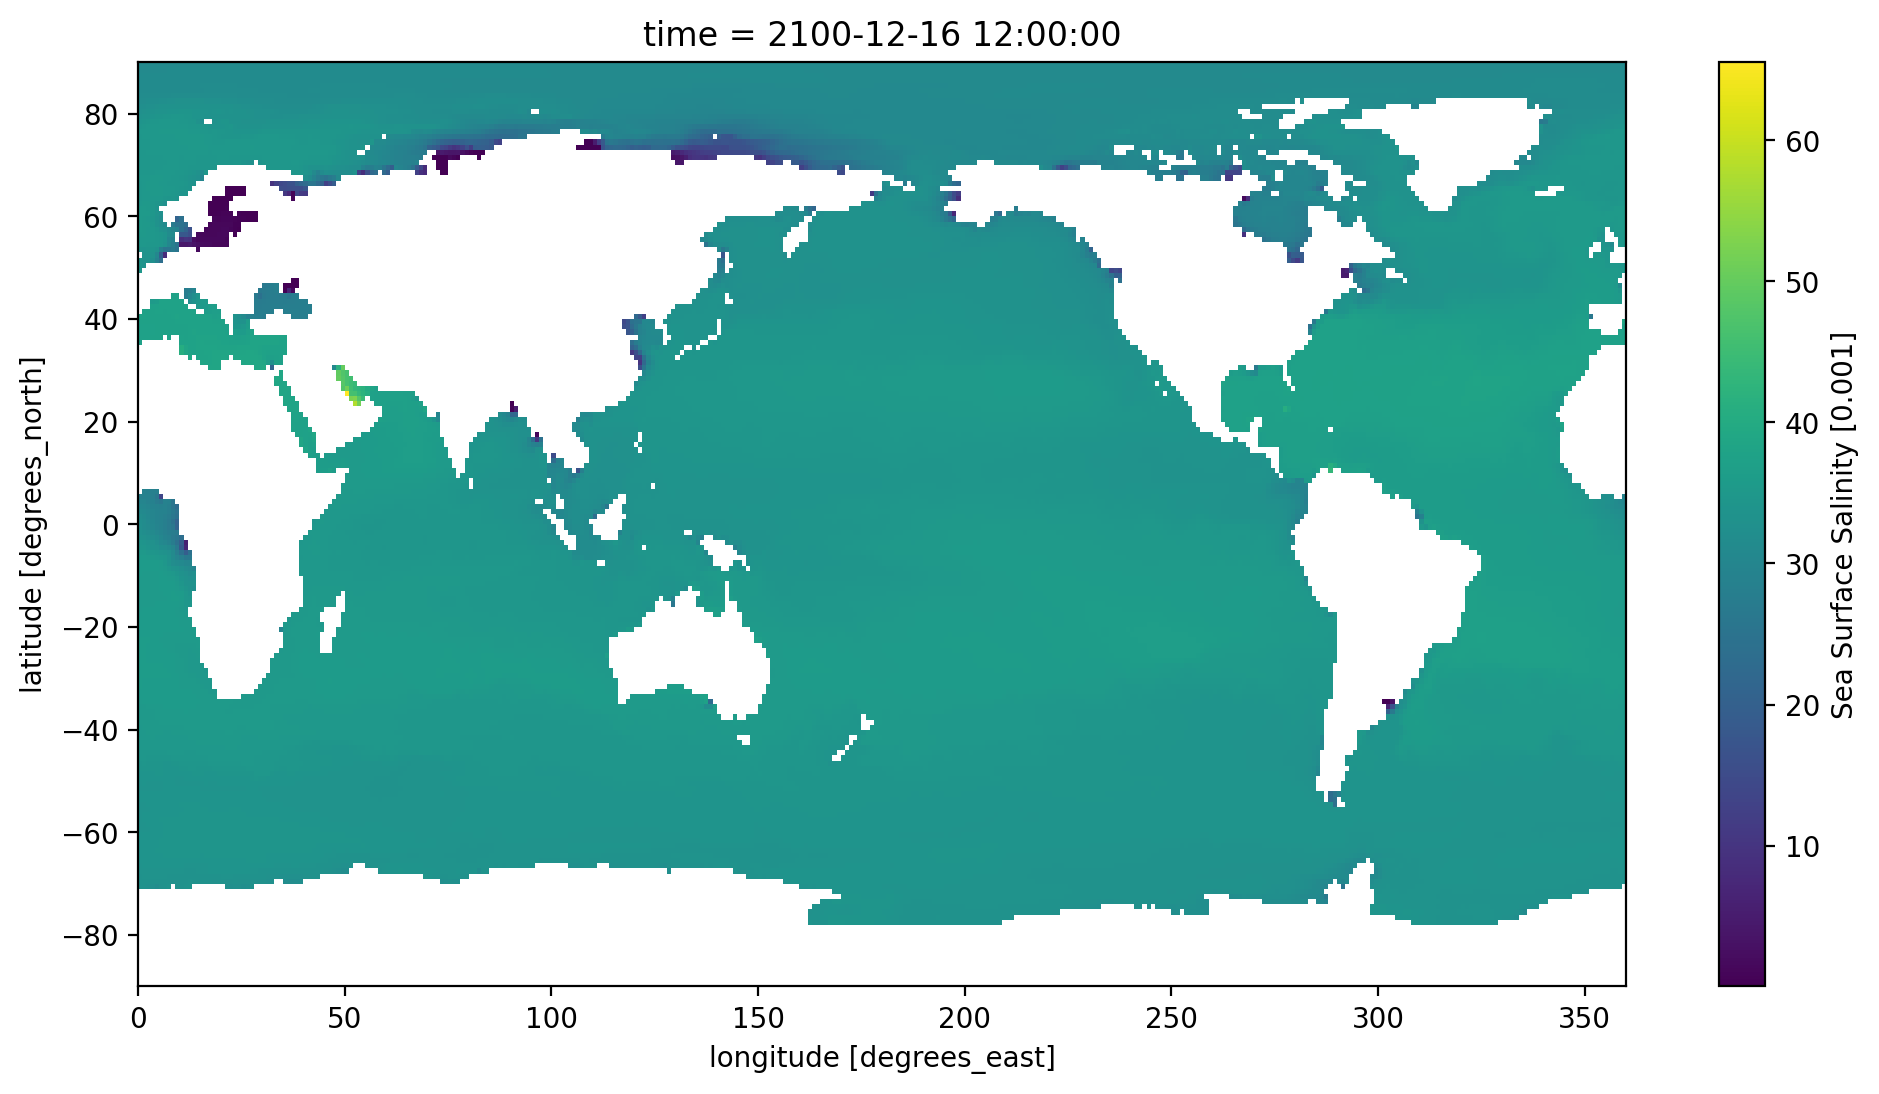

In [58]:
gfdl_esm4_sos2.sel(time=('2100-12-16')).plot()

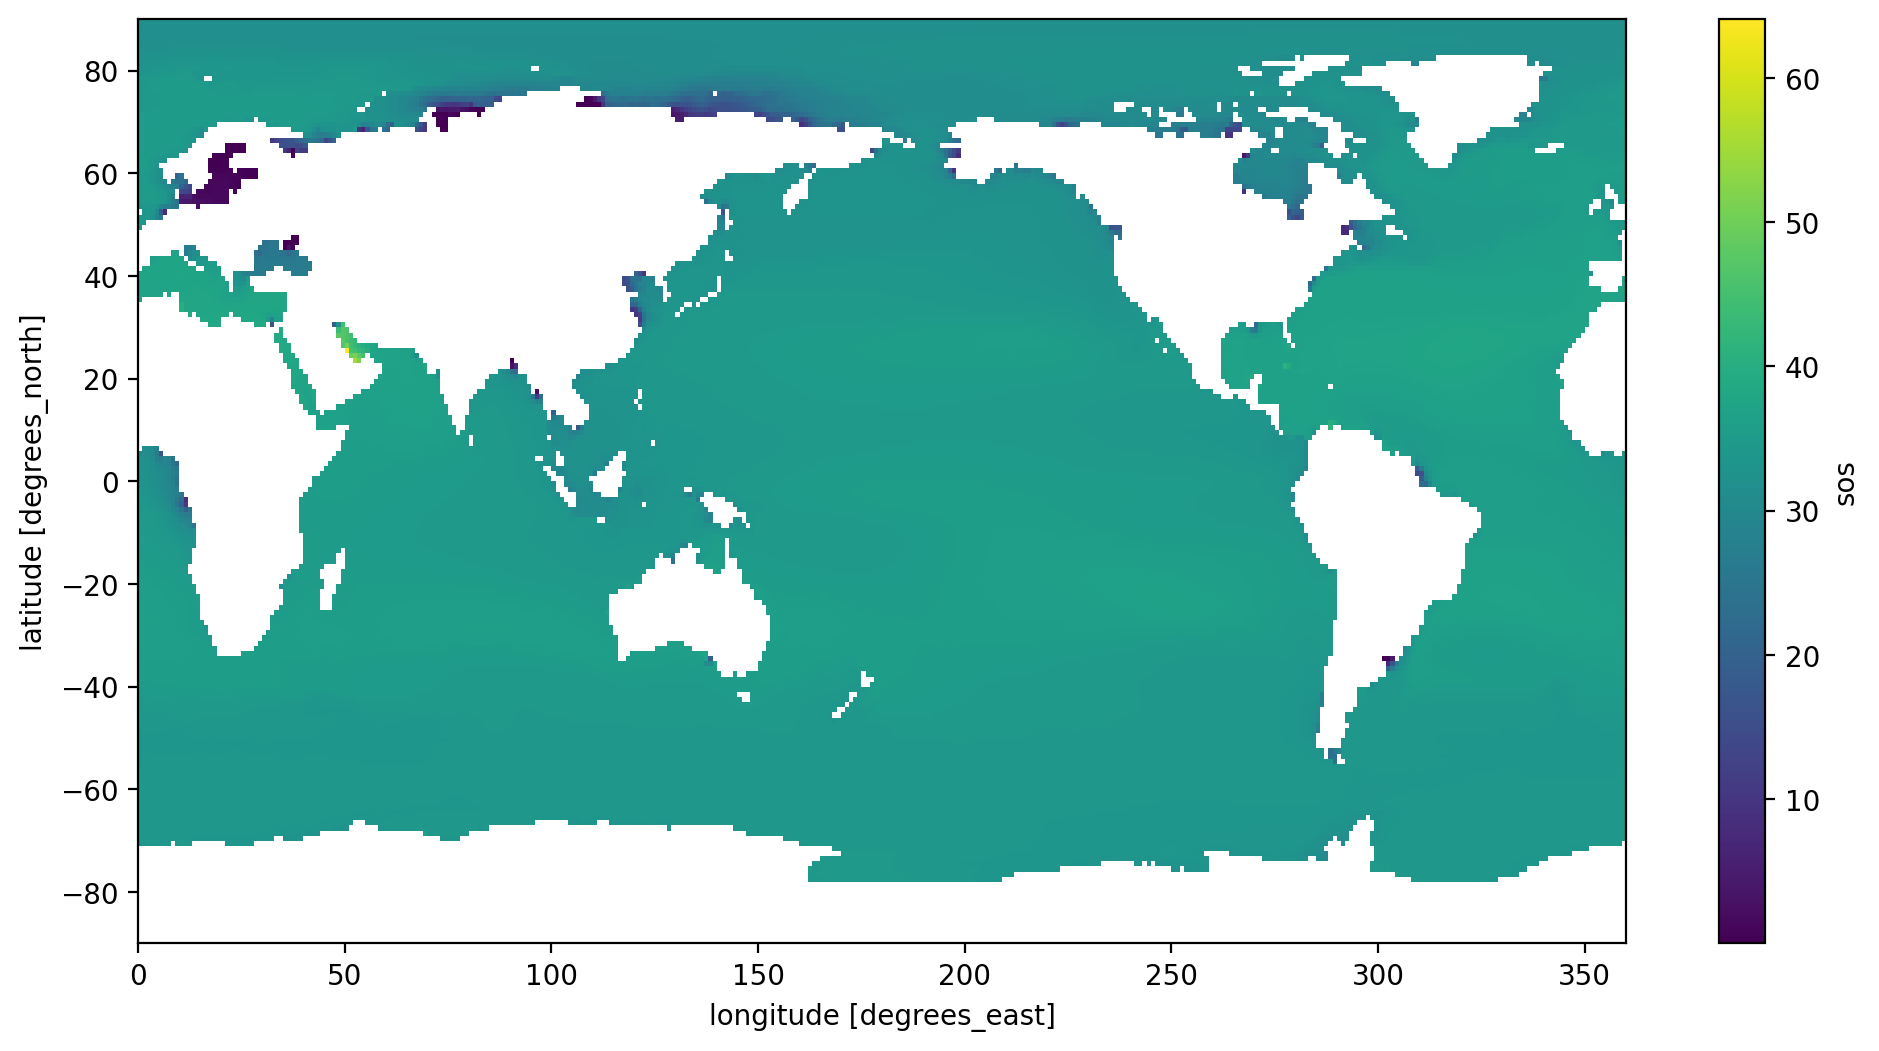

In [59]:
start_gfdl_esm4_sos1 = gfdl_esm4_sos1.sel(time=slice('2015-01-16','2035-12-01')).mean(dim='time').squeeze()
start_gfdl_esm4_sos1.plot()

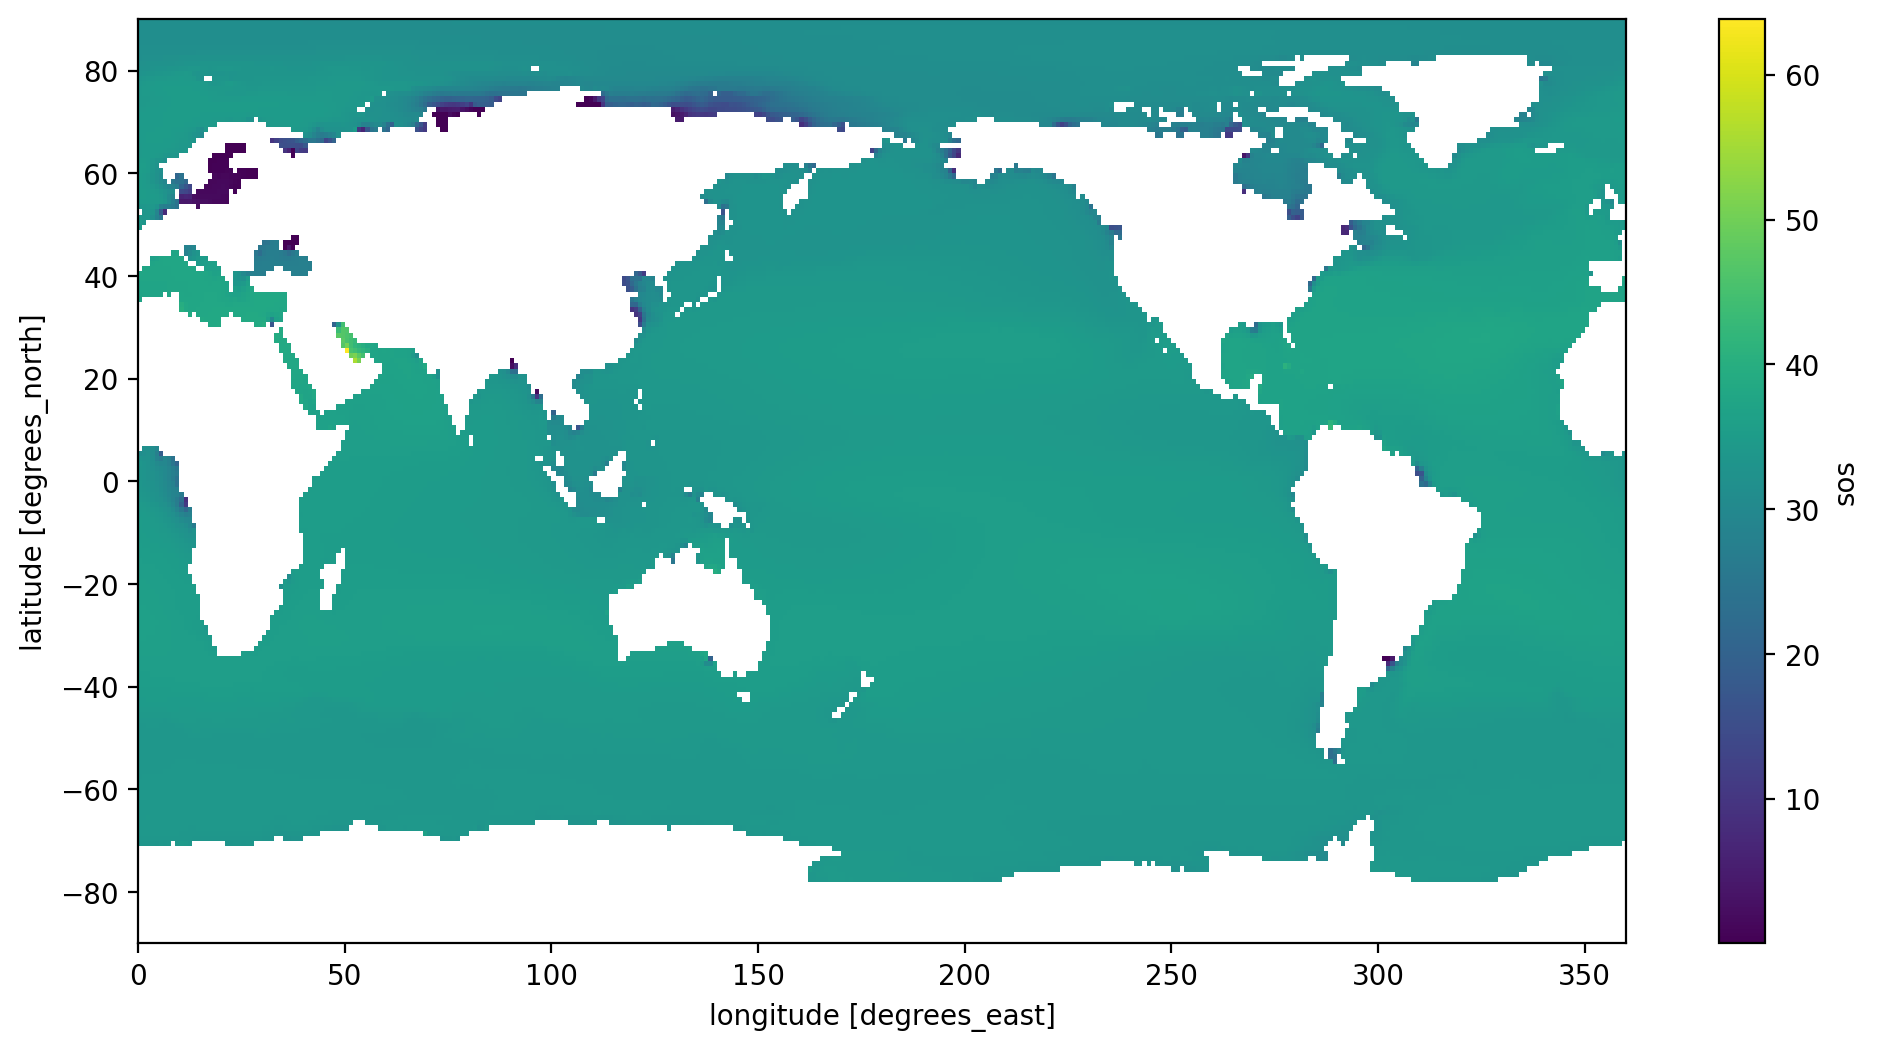

In [60]:
end_gfdl_esm4_sos1 = gfdl_esm4_sos1.sel(time=slice('2080-01-16','2100-12-01')).mean(dim='time').squeeze()
end_gfdl_esm4_sos1.plot()

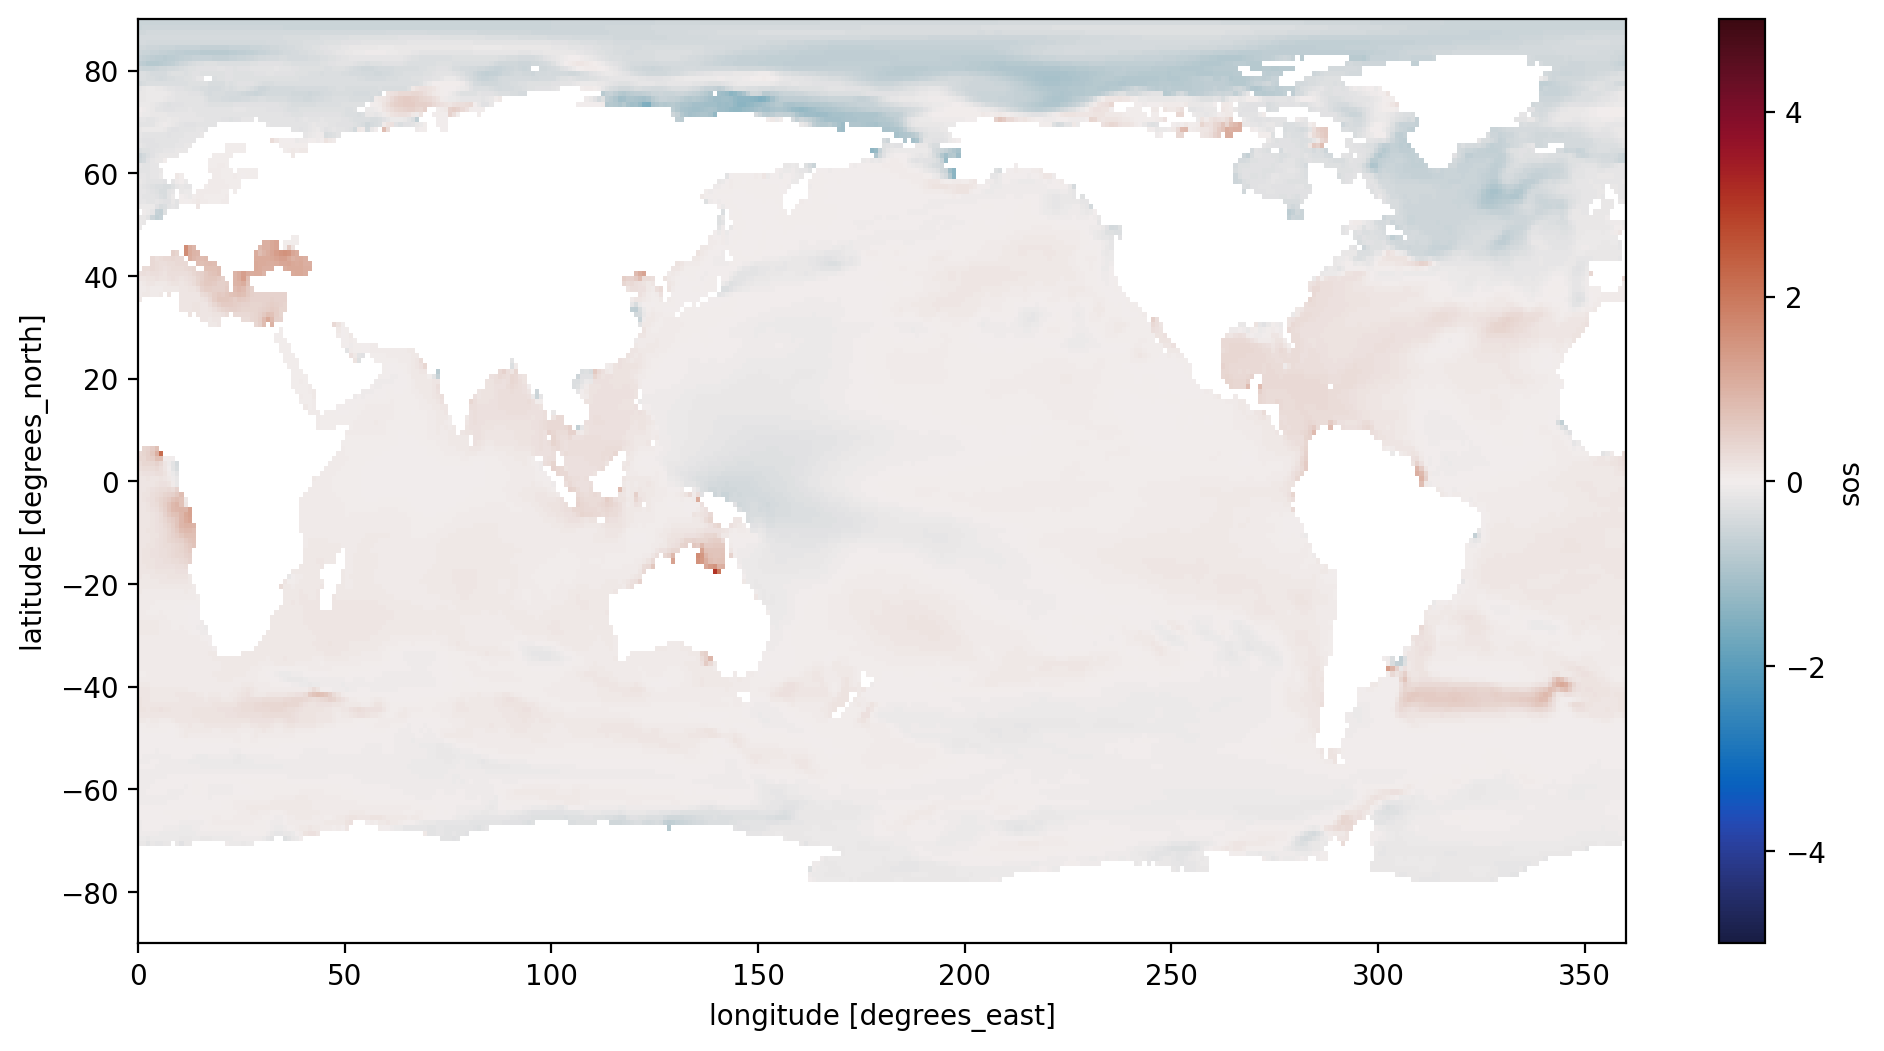

In [61]:
difference_sos1 = end_gfdl_esm4_sos1 - start_gfdl_esm4_sos1
difference_sos1.plot(vmin=-5,                  
                       vmax=5,cmap=cmocean.cm.balance)

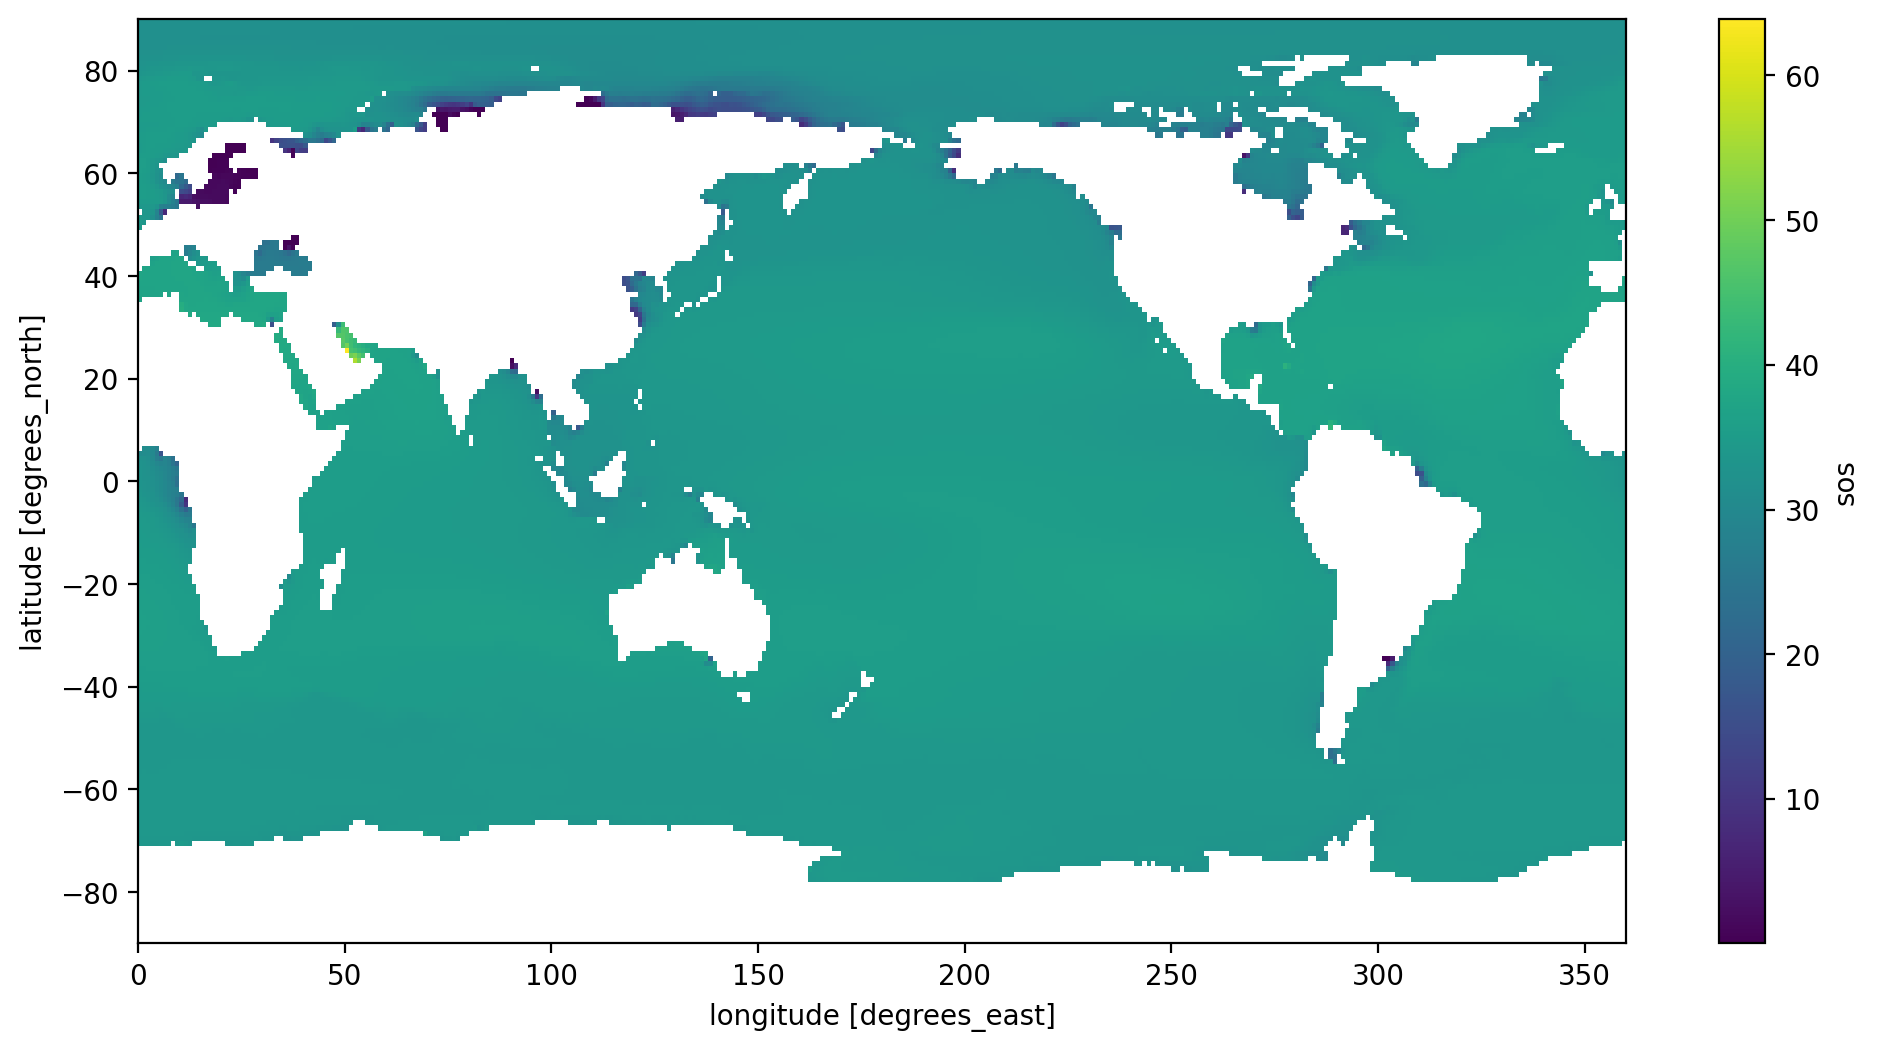

In [62]:
start_gfdl_esm4_sos2 = gfdl_esm4_sos2.sel(time=slice('2015-01-16','2035-12-01')).mean(dim='time').squeeze()
start_gfdl_esm4_sos2.plot()

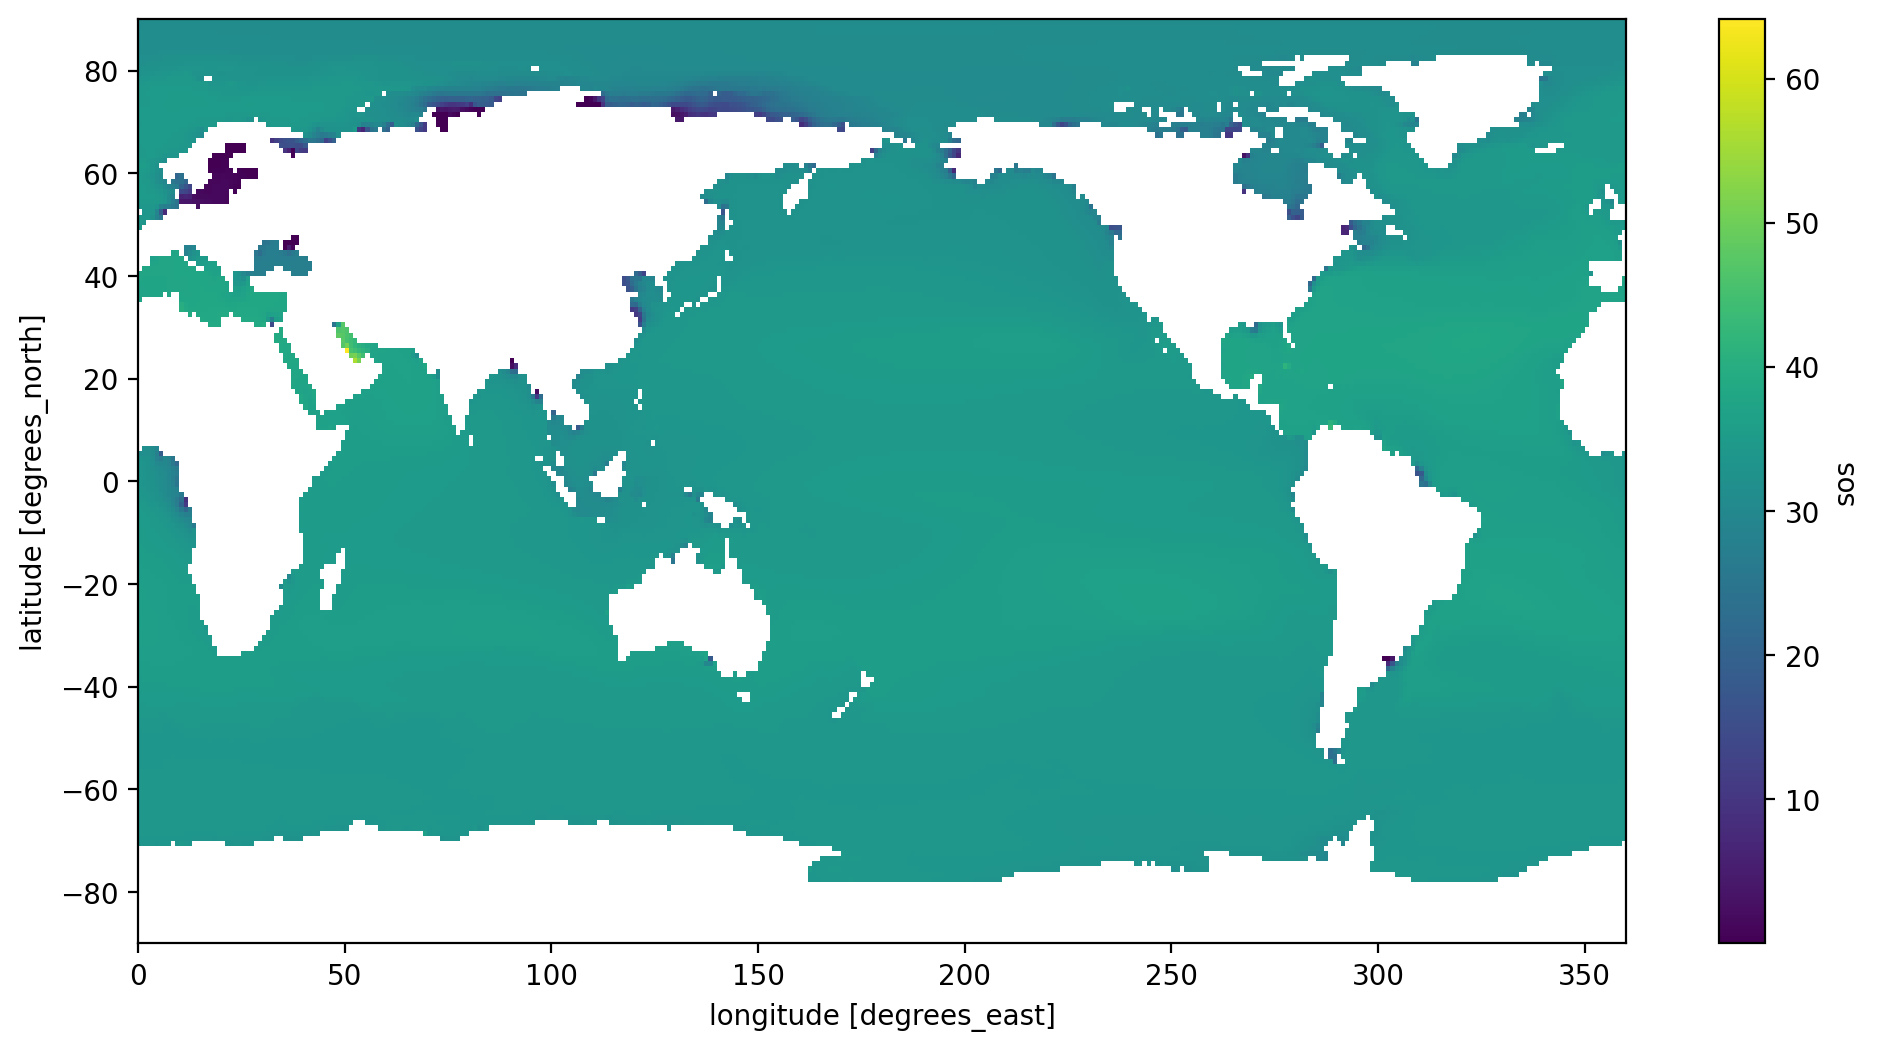

In [63]:
end_gfdl_esm4_sos2 = gfdl_esm4_sos2.sel(time=slice('2080-01-16','2100-12-01')).mean(dim='time').squeeze()
end_gfdl_esm4_sos2.plot()

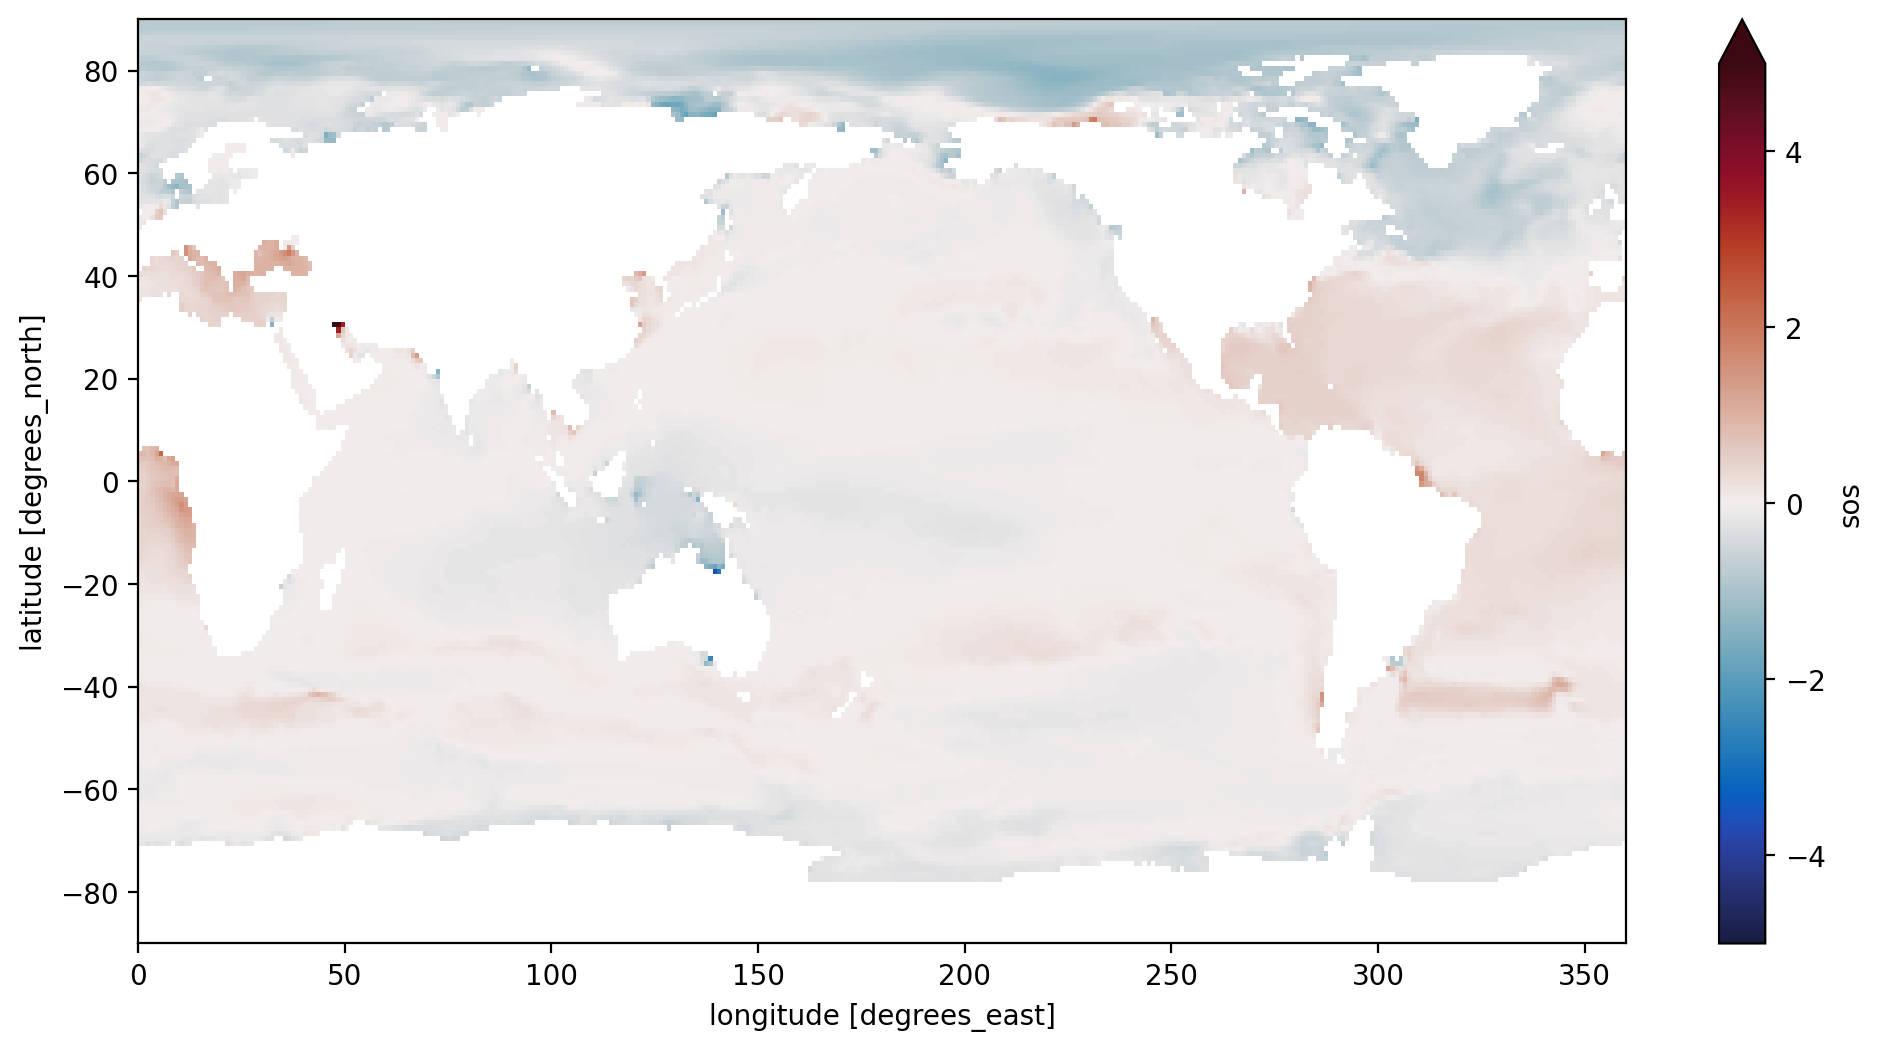

In [64]:
difference_sos2 = end_gfdl_esm4_sos2 - start_gfdl_esm4_sos2
difference_sos2.plot(vmin=-5,                  
                       vmax=5,cmap=cmocean.cm.balance)

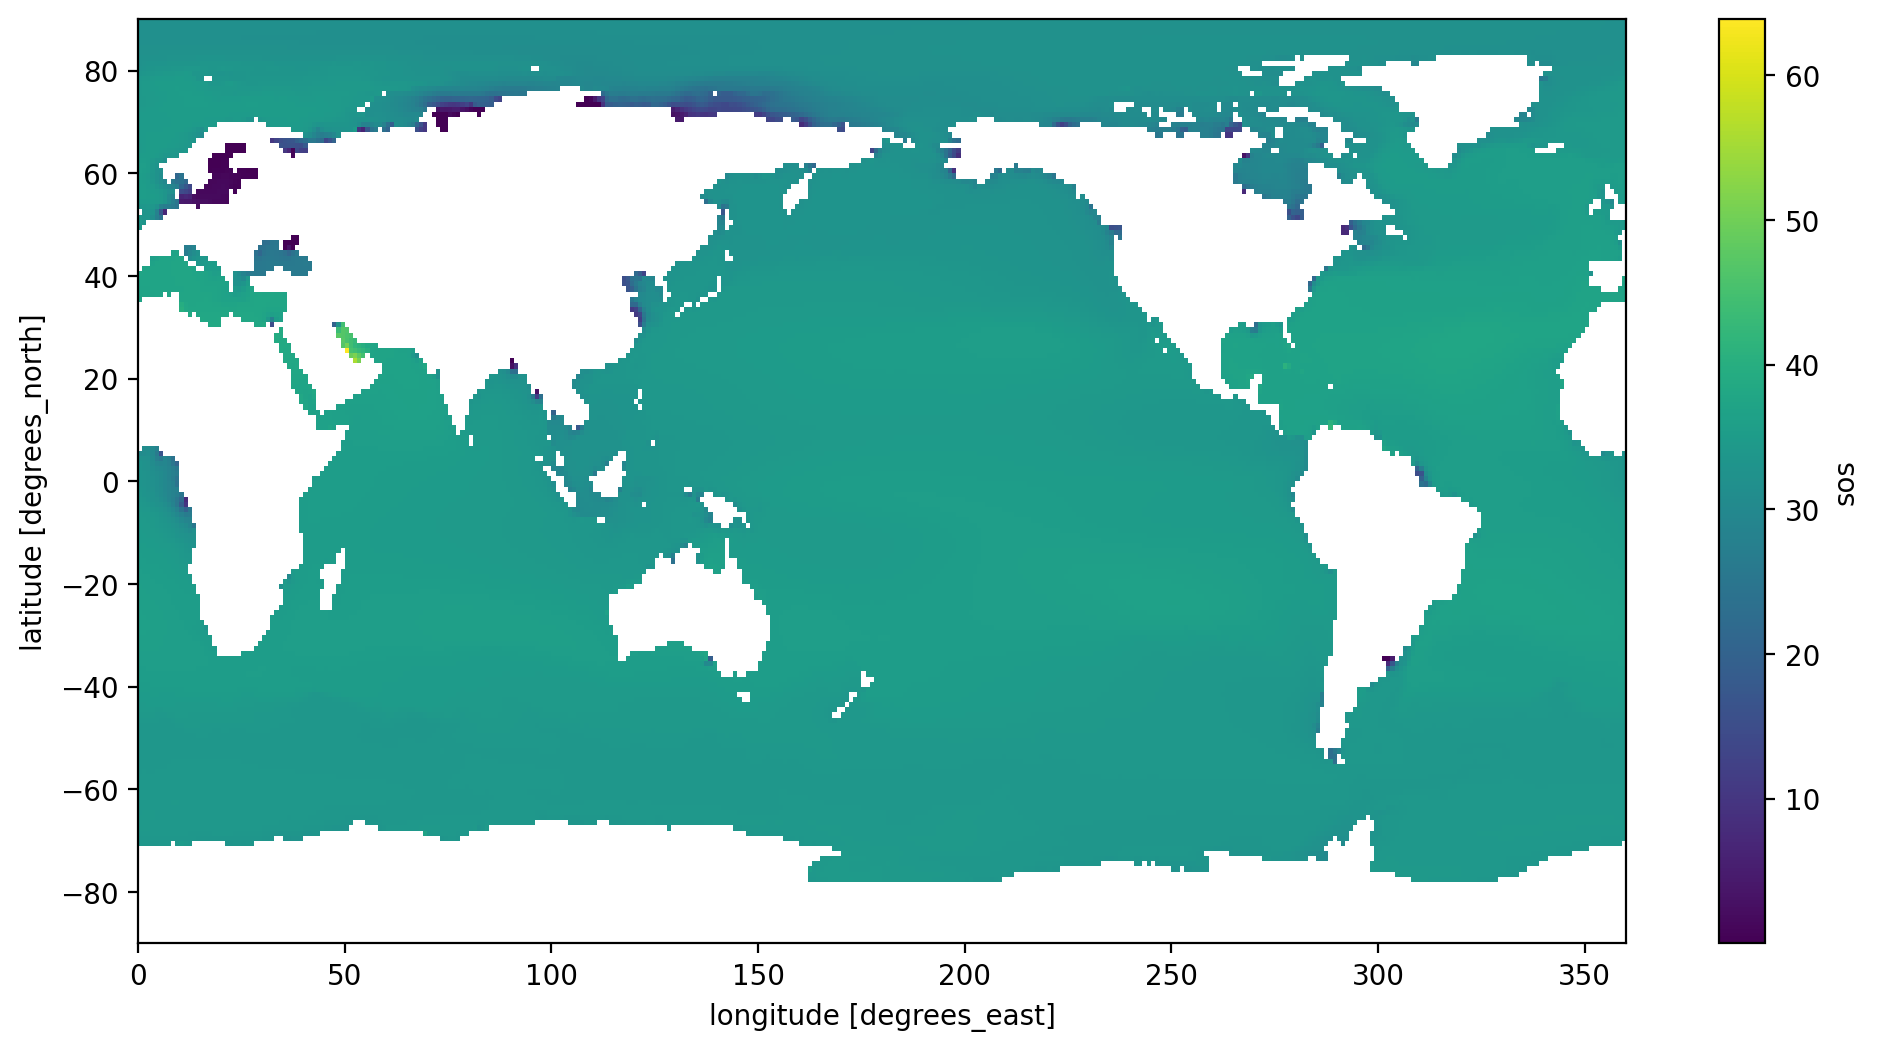

In [65]:
start_gfdl_esm4_sos3 = gfdl_esm4_sos3.sel(time=slice('2015-01-16','2035-12-01')).mean(dim='time').squeeze()
start_gfdl_esm4_sos3.plot()

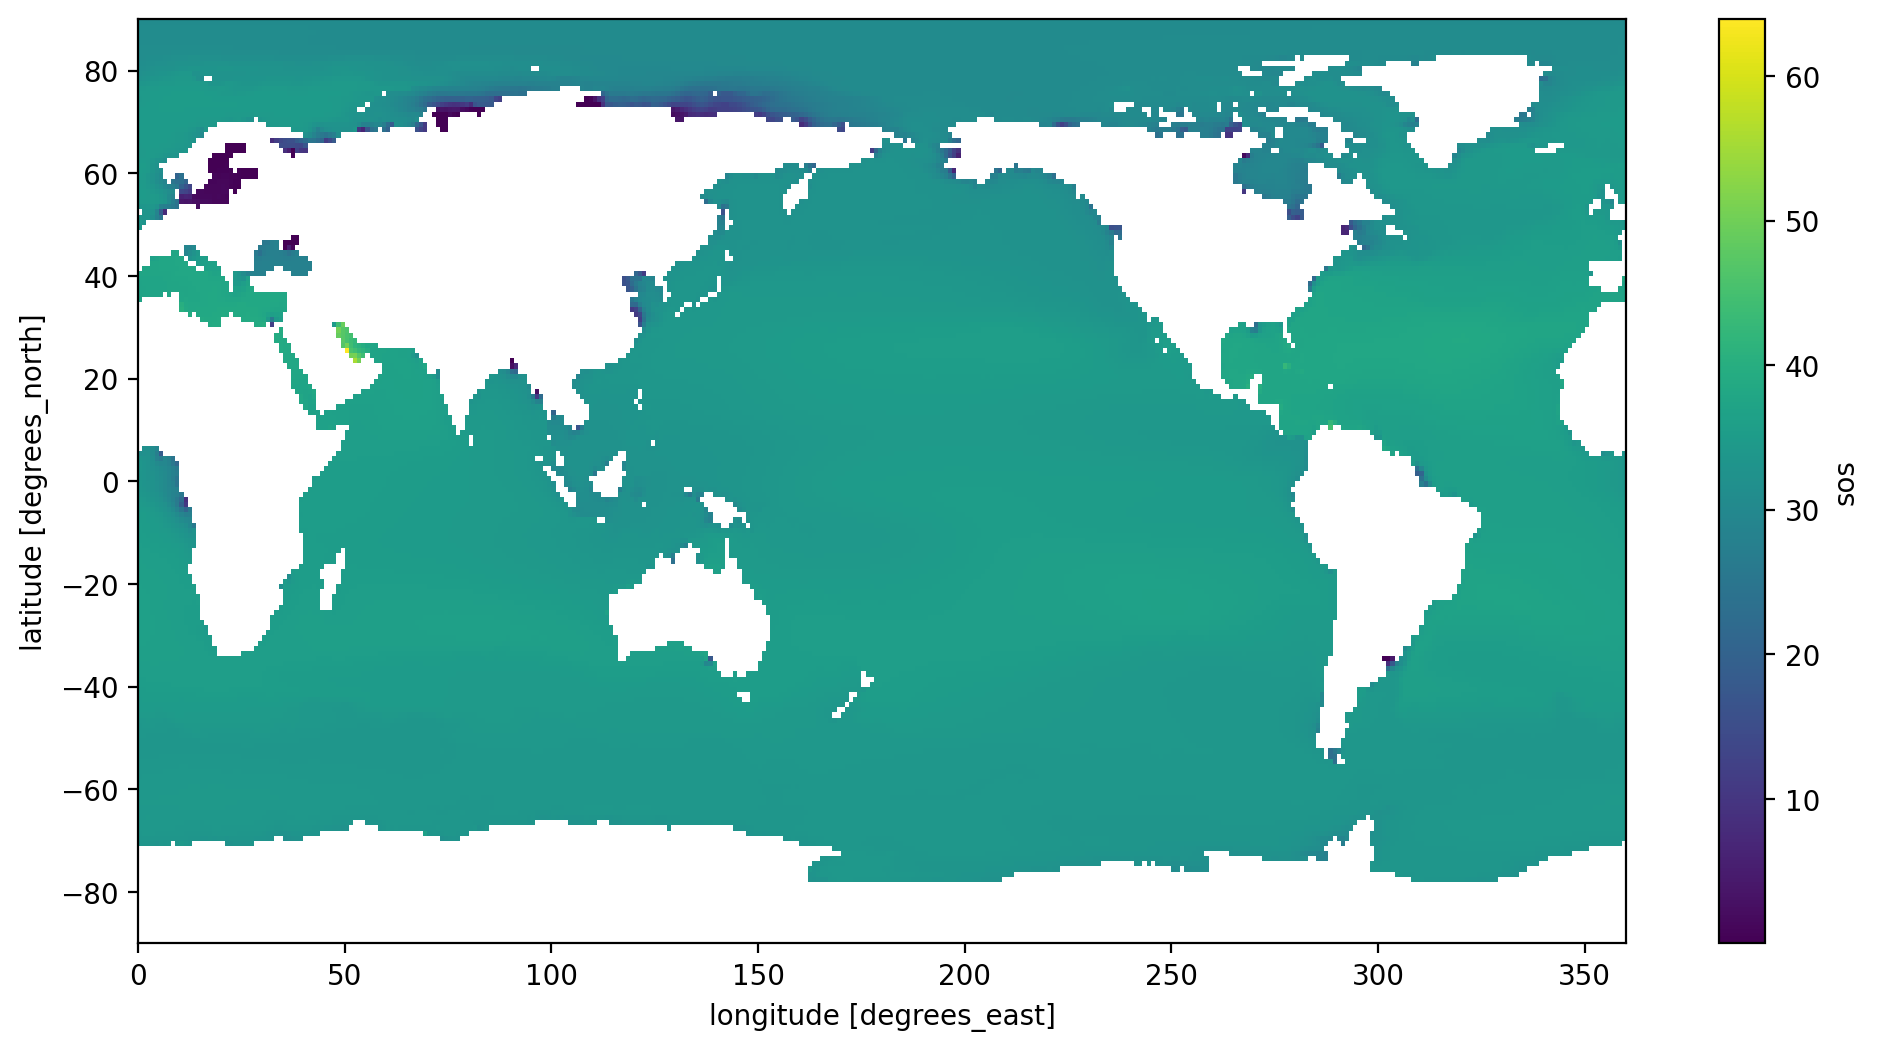

In [66]:
end_gfdl_esm4_sos3 = gfdl_esm4_sos3.sel(time=slice('2080-01-16','2100-12-01')).mean(dim='time').squeeze()
end_gfdl_esm4_sos3.plot()

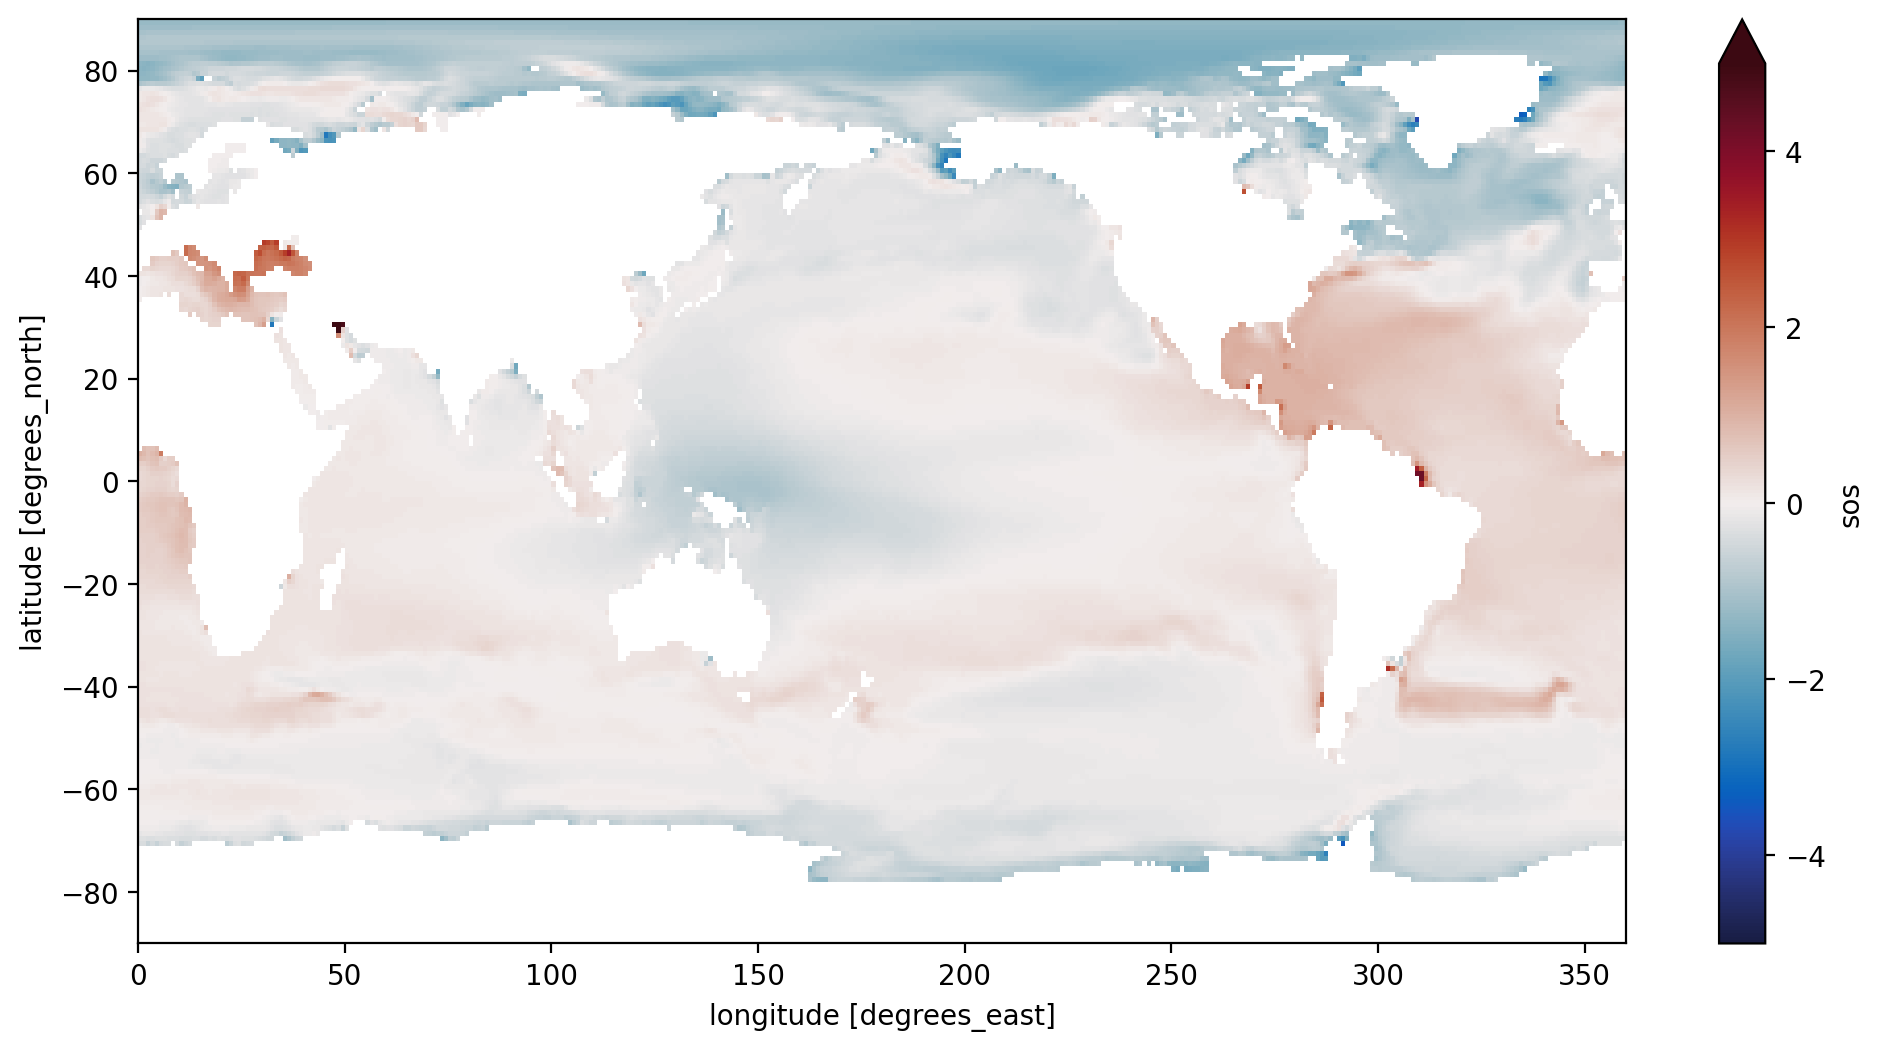

In [67]:
difference_sos3 = end_gfdl_esm4_sos3 - start_gfdl_esm4_sos3
difference_sos3.plot(vmin=-5,                  
                       vmax=5,cmap=cmocean.cm.balance)

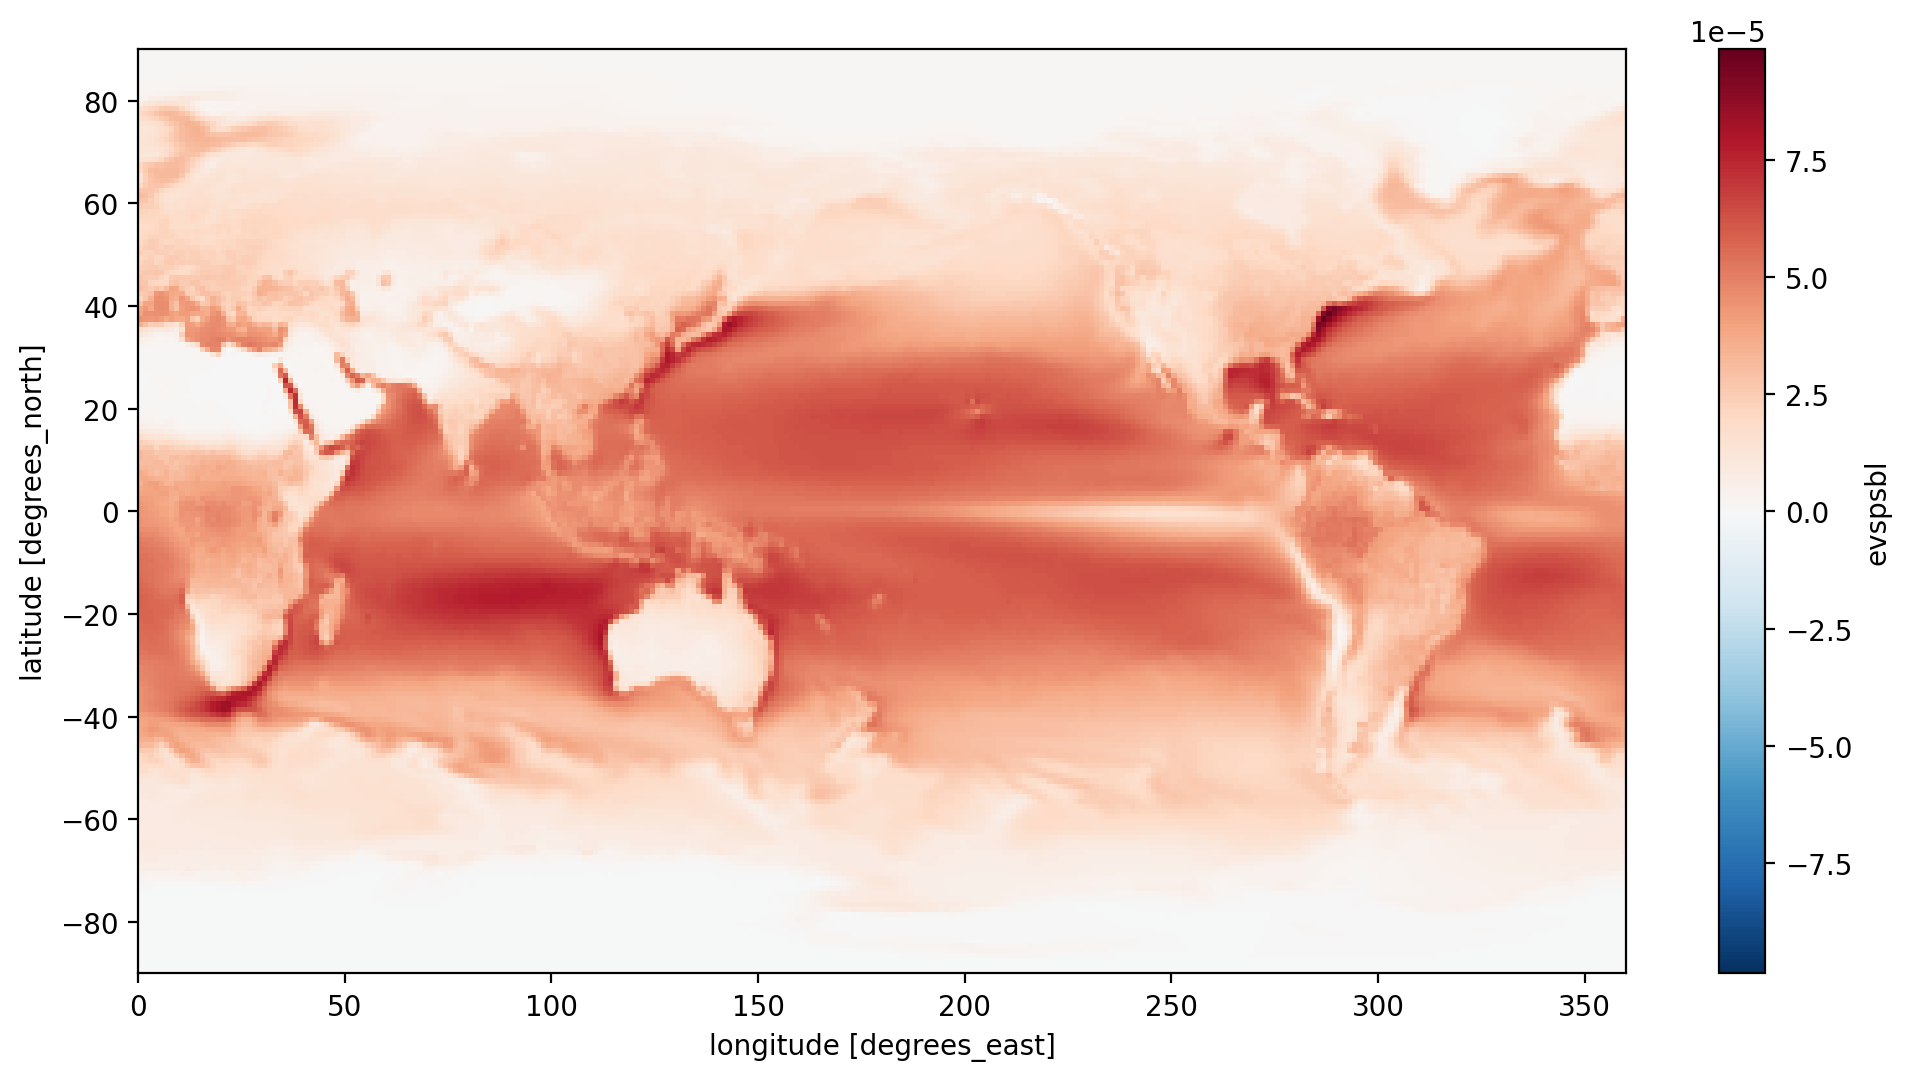

In [68]:
start_gfdl_esm4_evspsbl1 = gfdl_esm4_evspsbl1.sel(time=slice('2015-01-16','2035-12-01')).mean(dim='time').squeeze()
start_gfdl_esm4_evspsbl1.plot()

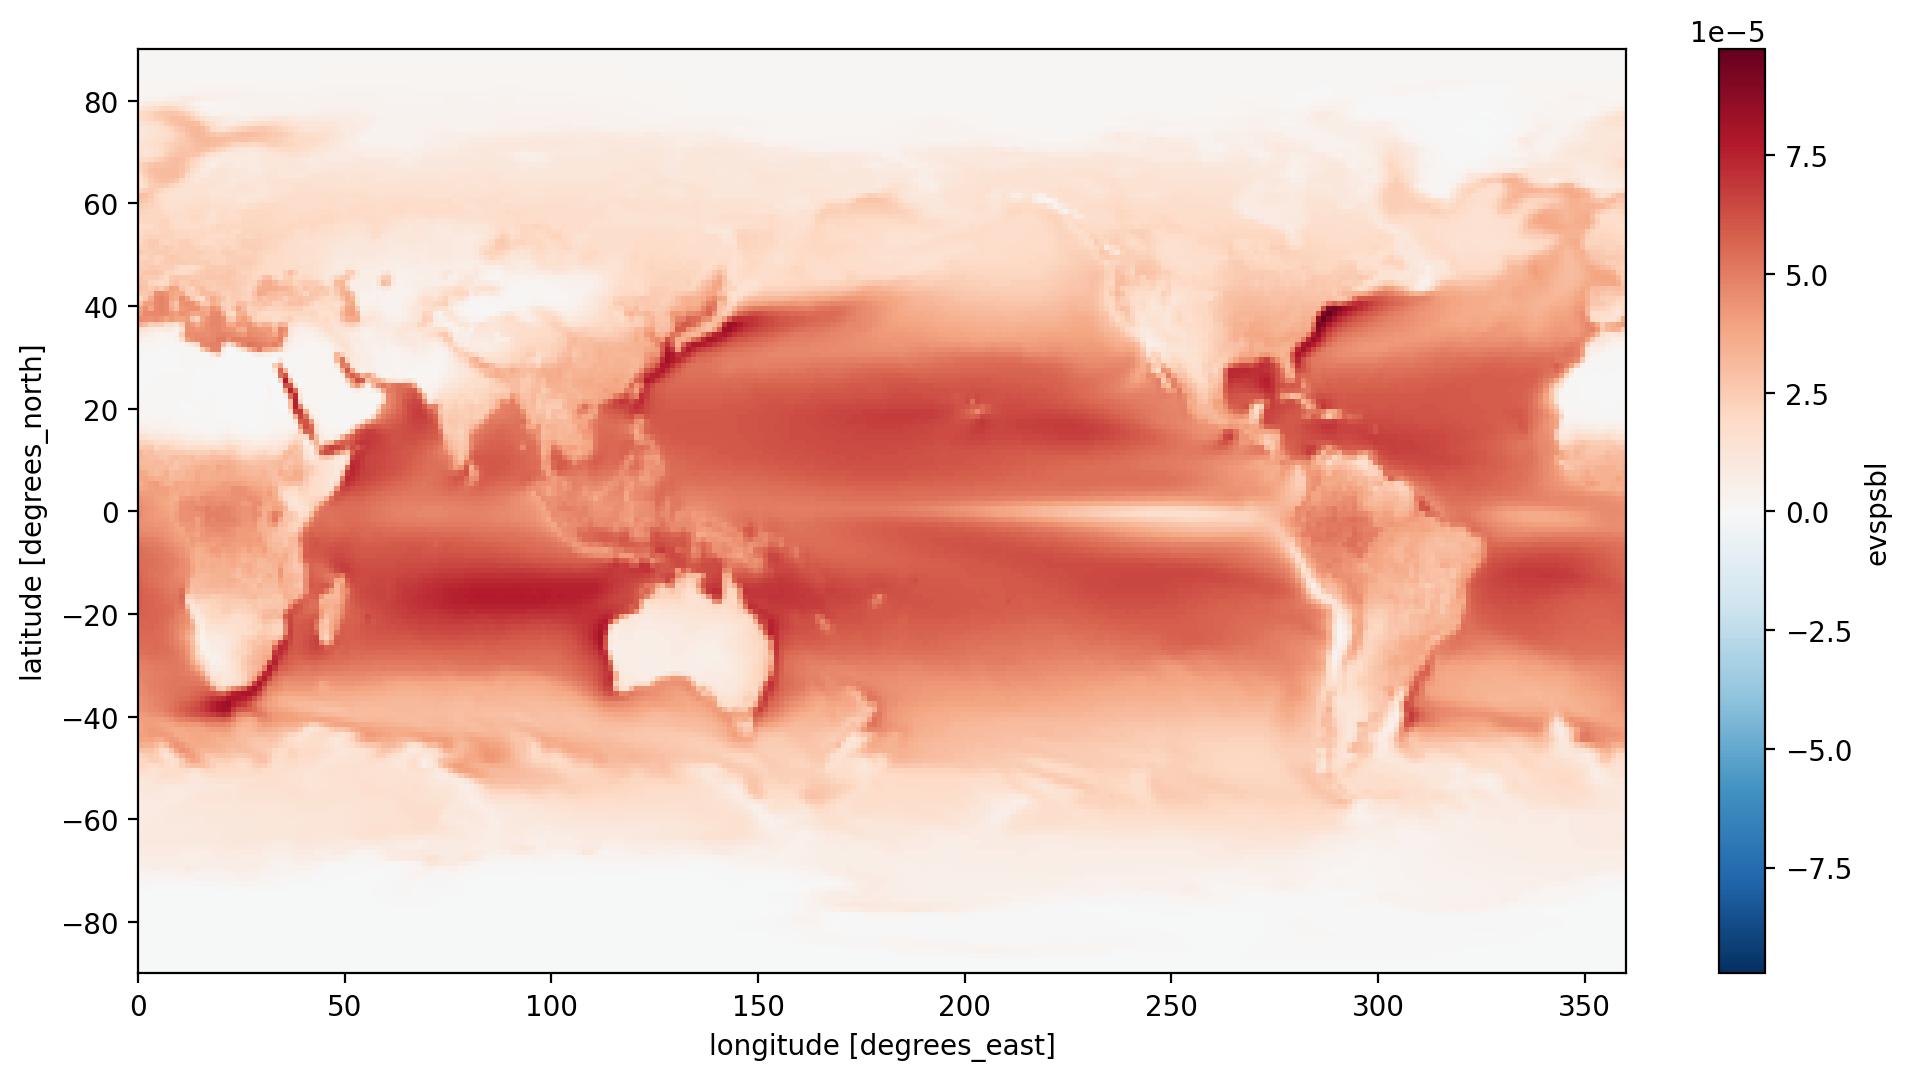

In [69]:
end_gfdl_esm4_evspsbl1 = gfdl_esm4_evspsbl1.sel(time=slice('2080-01-16','2100-12-01')).mean(dim='time').squeeze()
end_gfdl_esm4_evspsbl1.plot()

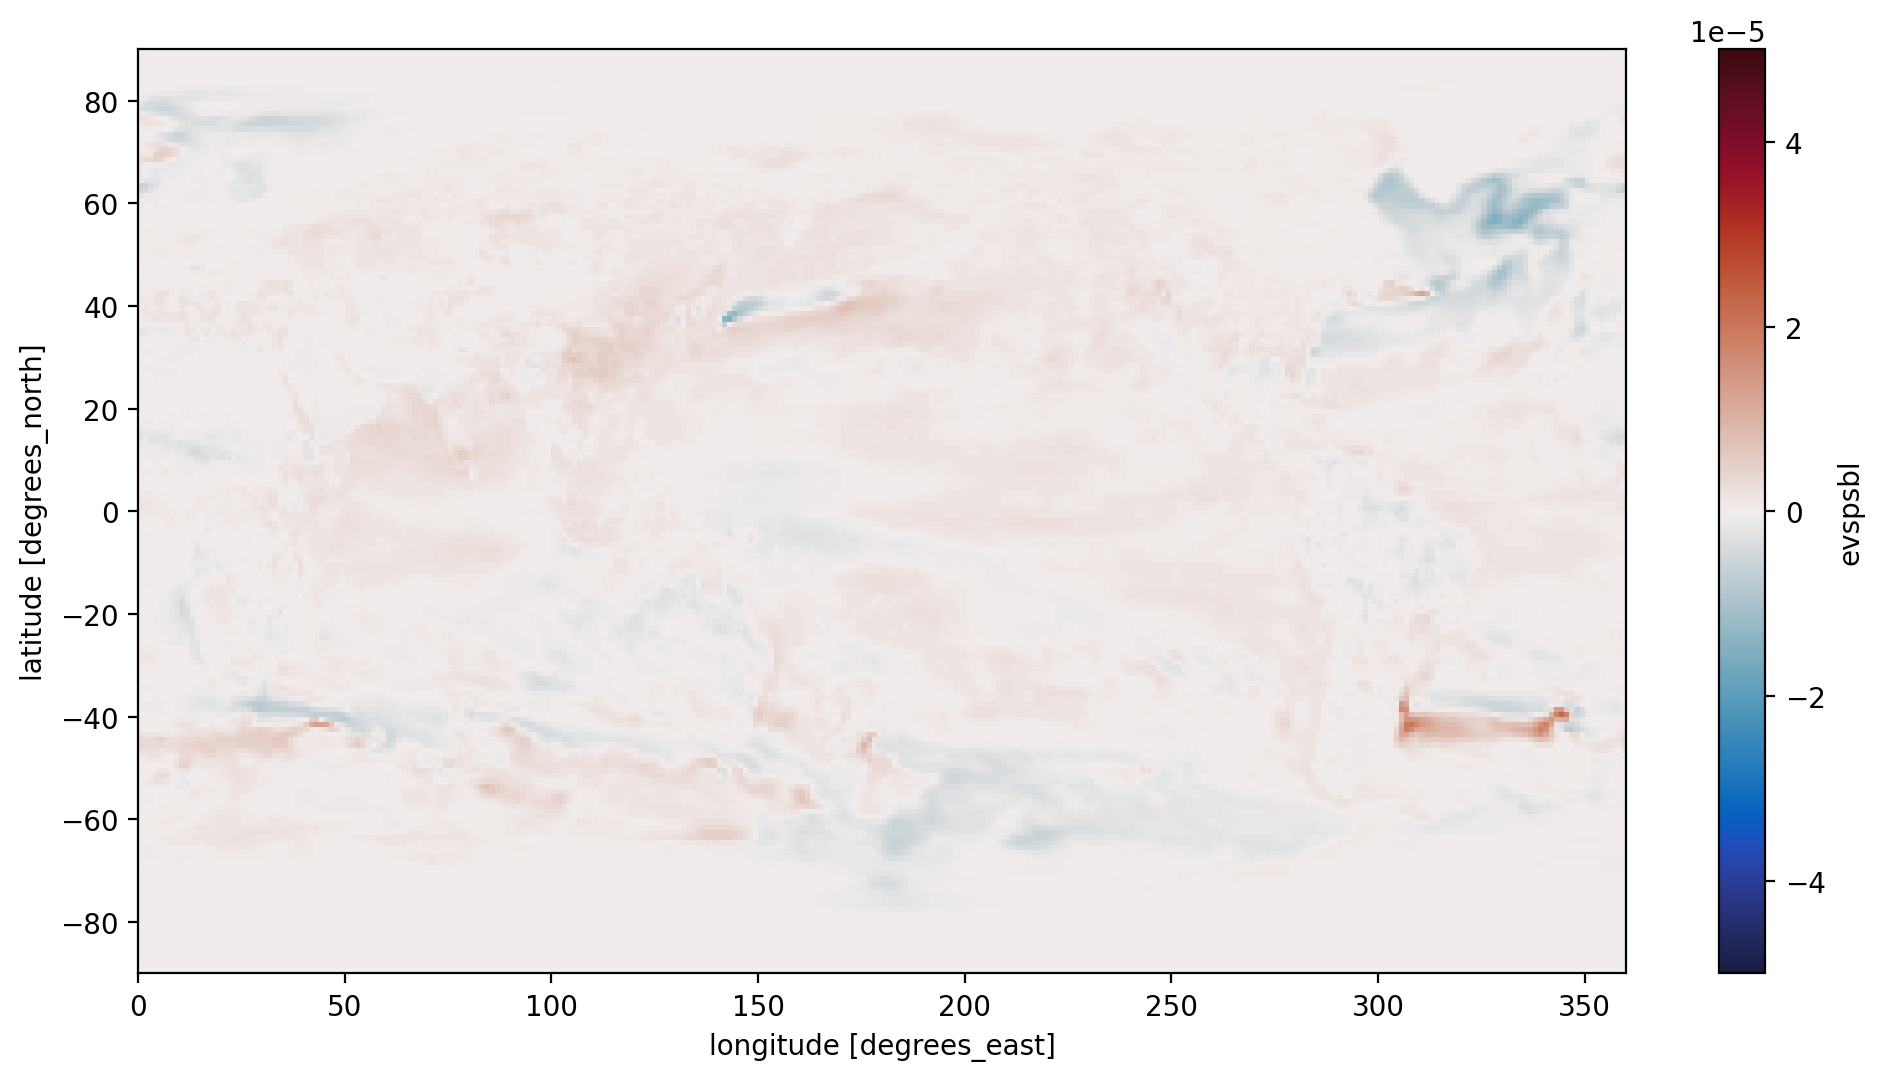

In [78]:
difference_evspsbl1 = end_gfdl_esm4_evspsbl1 - start_gfdl_esm4_evspsbl1
difference_evspsbl1.plot(vmin=-0.00005,                  
                       vmax=0.00005,cmap=cmocean.cm.balance)

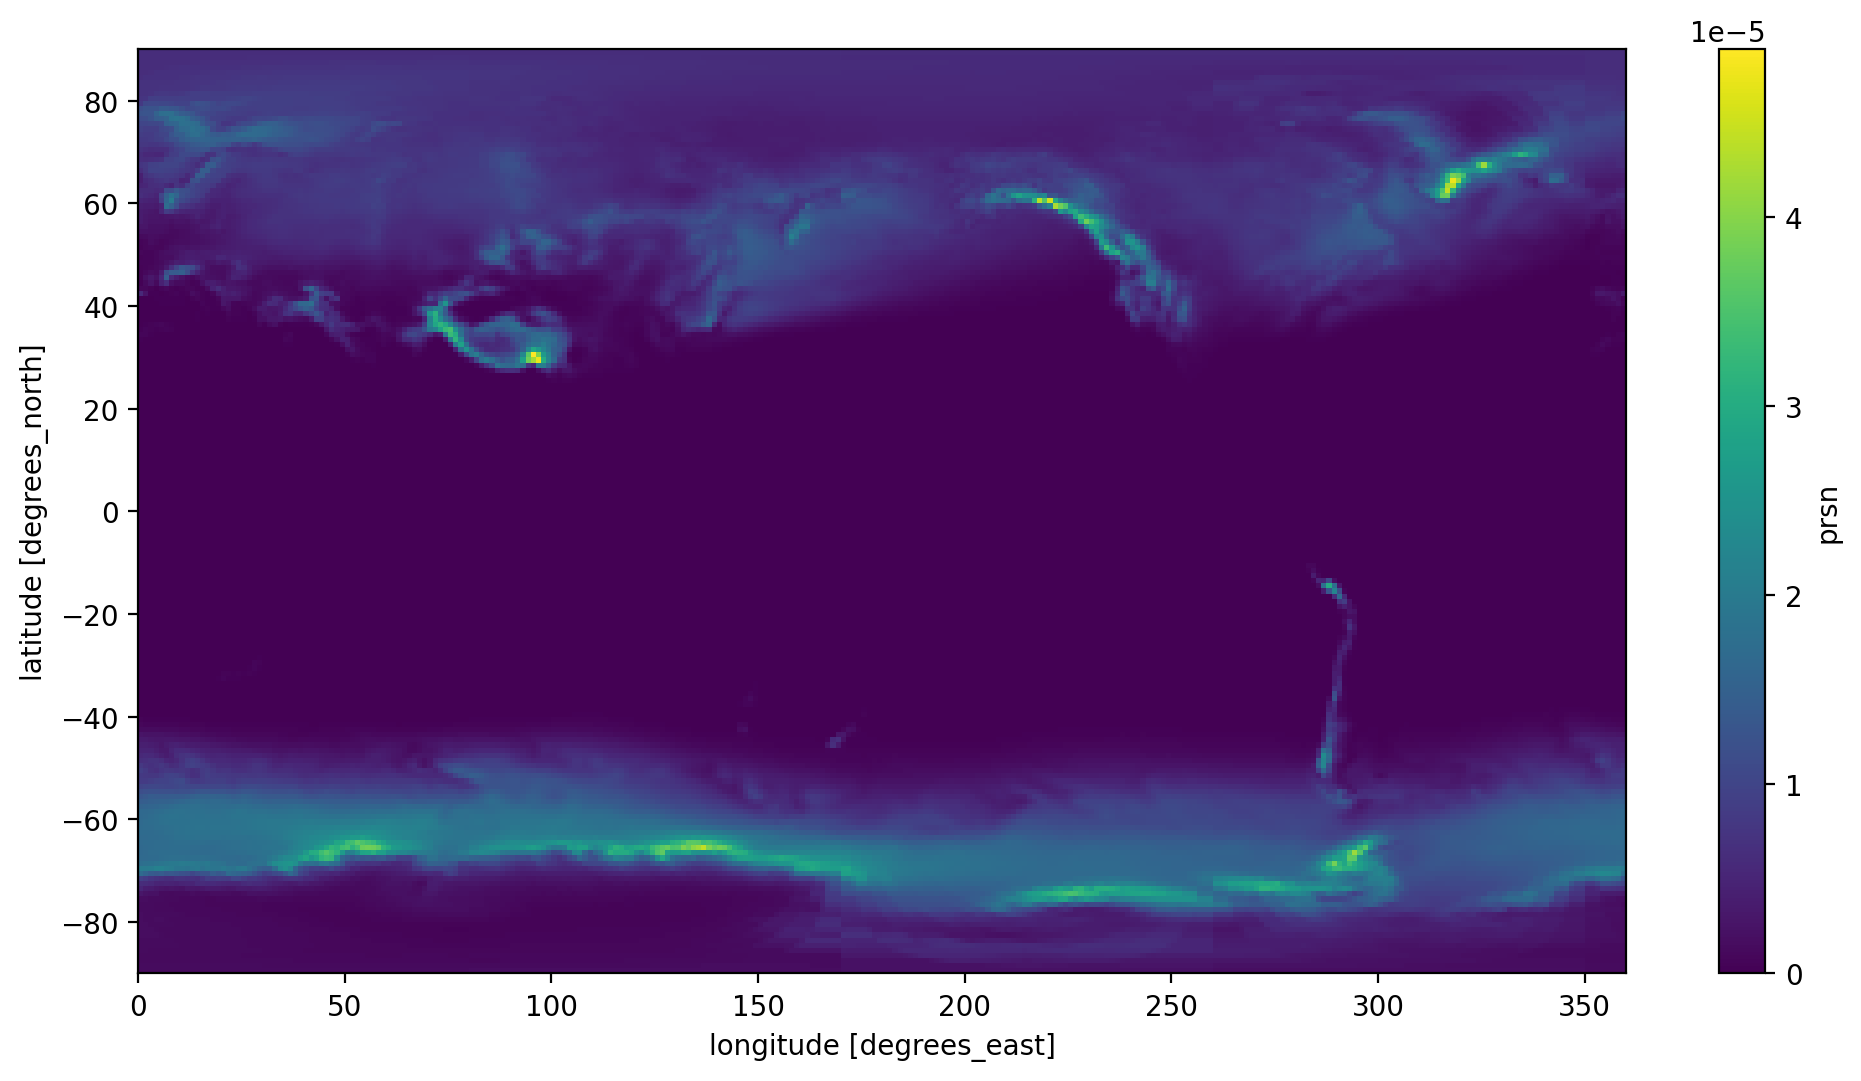

In [79]:
start_gfdl_esm4_prsn1 = gfdl_esm4_prsn1.sel(time=slice('2015-01-16','2035-12-01')).mean(dim='time').squeeze()
start_gfdl_esm4_prsn1.plot()

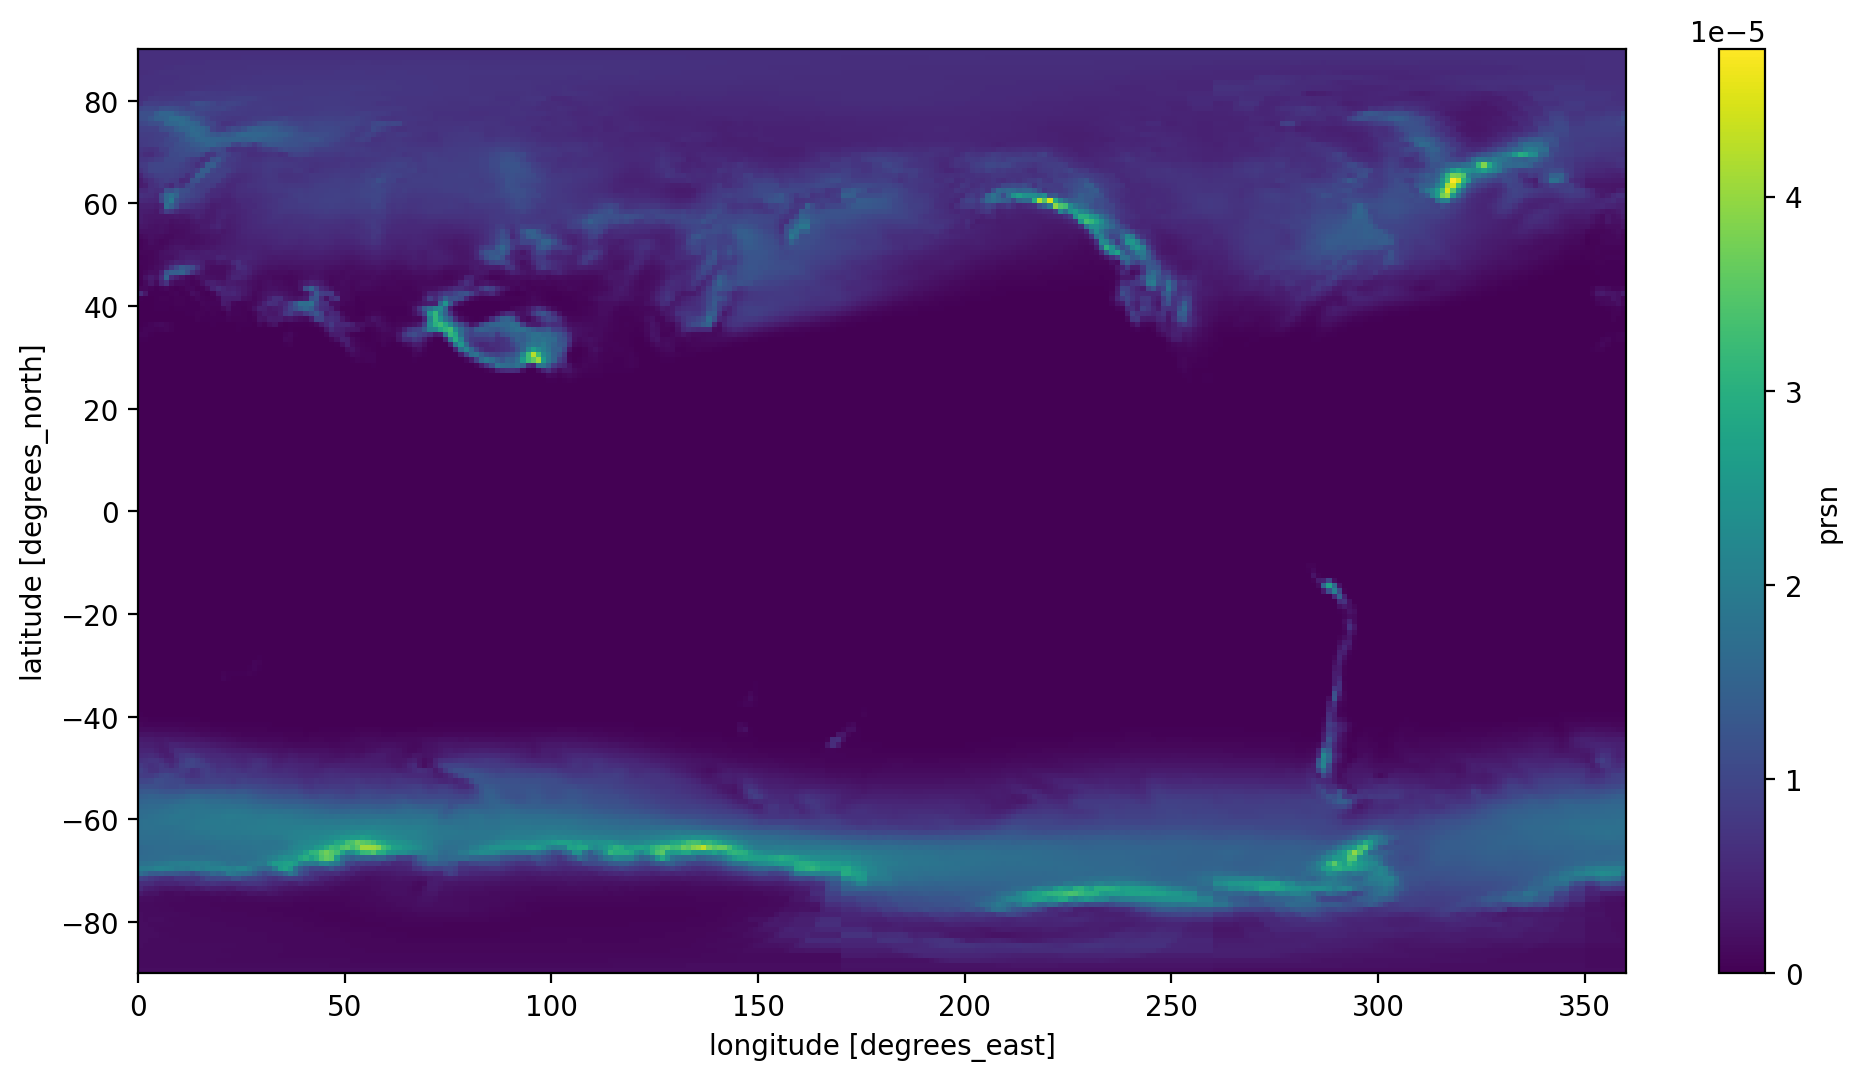

In [80]:
end_gfdl_esm4_prsn1 = gfdl_esm4_prsn1.sel(time=slice('2080-01-16','2100-12-01')).mean(dim='time').squeeze()
end_gfdl_esm4_prsn1.plot()

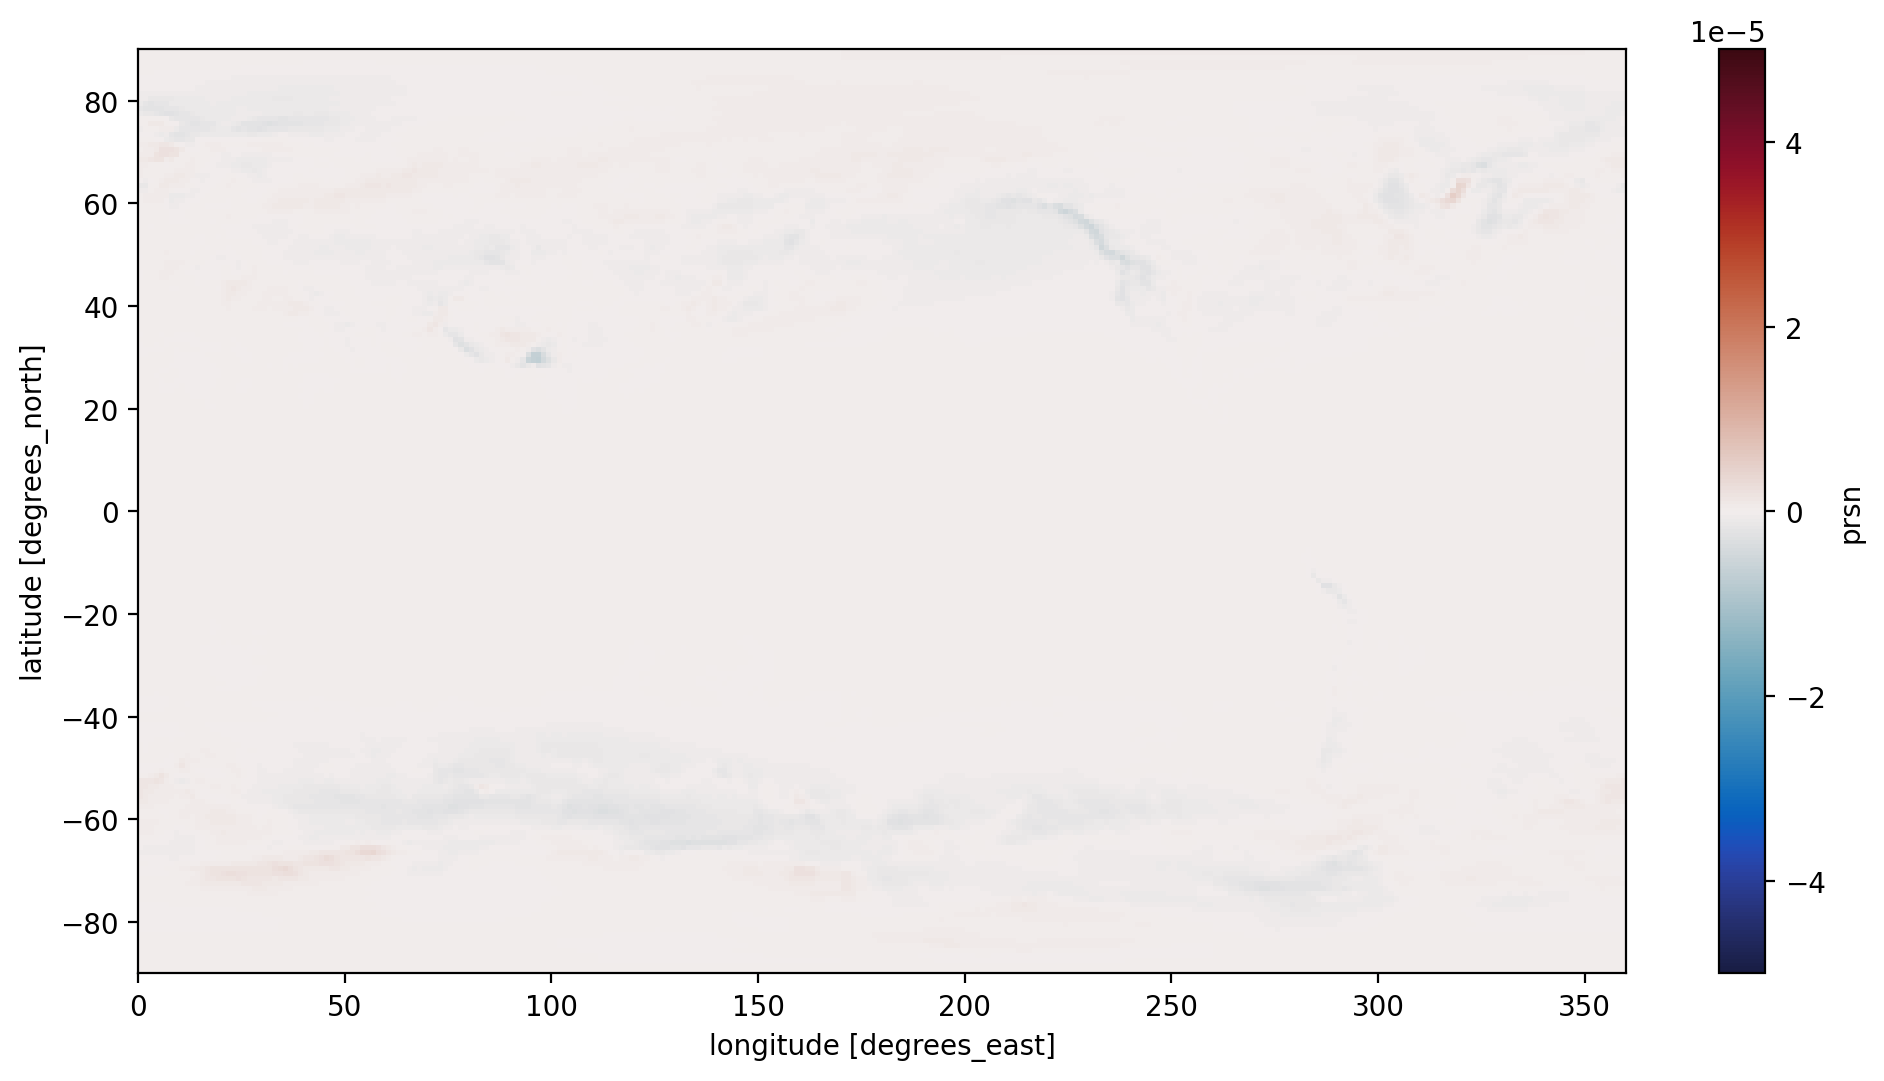

In [83]:
difference_prsn1 = end_gfdl_esm4_prsn1 - start_gfdl_esm4_prsn1
difference_prsn1.plot(vmin=-0.00005,                  
                       vmax=0.00005,cmap=cmocean.cm.balance)